In [1499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# help in finding and showing the desired k for the elbow method
from kneed import KneeLocator
# dendogram for kmeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
# dimension reduction
from sklearn.decomposition import PCA
# visualization
import visuals as vs
# scaler for easier understanding
from sklearn.preprocessing import StandardScaler
# removes unnecessary warnings (for nicer looking graphs)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1500]:
df = pd.read_csv('FlightsDB.csv', parse_dates=['Snapshot Time', 'Departure Date', 'Return Date'], dayfirst=True)

In [1501]:
df.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,688,2025-03-06,Kayak,150,170
1,London,Rome,1,1,9:10,2025-03-07,12:40,6:35,2025-03-08,8:25,...,0,0,NaN,0,0,726,2025-03-06,Kayak,150,170
2,London,Rome,1,1,9:20,2025-03-07,12:50,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,752,2025-03-06,Kayak,150,170
3,London,Rome,1,1,9:05,2025-03-07,12:35,11:05,2025-03-08,12:50,...,0,0,NaN,0,0,782,2025-03-06,Kayak,150,165
4,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,771,2025-03-06,Kayak,150,170


In [1502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  object        
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  object        
 7   Return Departure Time              540000 non-null  object        
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  object        
 10  Onward Departure Air

In [1503]:
df.describe()

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,540000.000000,540000.000000,540000,540000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000,540000.000000,540000.000000
mean,15.500000,3.000000,2025-03-23 20:00:00.000000512,2025-03-26 19:59:59.999999744,0.005148,0.911606,0.005393,1.040463,0.114917,0.007333,609.968856,2025-03-08 08:00:00,121.390337,121.632189
min,1.000000,1.000000,2025-03-07 00:00:00,2025-03-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,2025-03-06 00:00:00,60.000000,60.000000
25%,8.000000,2.000000,2025-03-16 00:00:00,2025-03-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,2025-03-06 00:00:00,80.000000,80.000000
50%,15.500000,3.000000,2025-03-24 00:00:00,2025-03-27 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,592.000000,2025-03-09 00:00:00,130.000000,130.000000
75%,23.000000,4.000000,2025-03-31 00:00:00,2025-04-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,740.000000,2025-03-10 00:00:00,150.000000,150.000000
max,30.000000,5.000000,2025-04-09 00:00:00,2025-04-14 00:00:00,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,2810.000000,2025-03-10 00:00:00,2460.000000,2530.000000
std,8.655449,1.414215,NaN,NaN,0.072210,21.541368,0.074241,23.917243,0.318922,0.090359,235.259242,NaN,44.691912,46.554233


In [1504]:
# filtering the rows where the onward and return airlines are the same (.copy() is to create an independent copy of the dataframe so that it doesn't affect the original dataframe)
df_filtered = df[df['Onward Airlines'] == df['Return Airlines']].copy()

In [1505]:
# taking only the columns that we think can help decide the pricing policy
df_filtered = df_filtered[["Price(NIS)", "Onward Airlines", "TTT", "LOS", "Departure Time", "Arrival Time",
                           "Return Departure Time", "Return Arrival Time", "Checked Bags", "Carry-ons",
                            "Onward Flight Connections", "Return Flight Connections",
                            "Total Onward Flight Duration(min)", "Total Return Flight Duration(min)"]]
# changing the name
df_filtered.rename(columns={'Onward Airlines': 'Airline'}, inplace=True)

# converting the time to datetime format instead of string for categorization
df_filtered['Departure Time'] = pd.to_datetime(df_filtered['Departure Time'], format='%H:%M').dt.time
df_filtered['Arrival Time'] = df_filtered['Arrival Time'].str.extract(r'(\d{2}:\d{2})')[0]
df_filtered['Arrival Time'] = pd.to_datetime(df_filtered['Arrival Time'], format='%H:%M').dt.time
df_filtered['Return Departure Time'] = pd.to_datetime(df_filtered['Return Departure Time'], format='%H:%M').dt.time
df_filtered['Return Arrival Time'] = df_filtered['Return Arrival Time'].str.extract(r'(\d{2}:\d{2})')[0]
df_filtered['Return Arrival Time'] = pd.to_datetime(df_filtered['Return Arrival Time'], format='%H:%M').dt.time

In [1506]:
# categorizing the time into Morning, Noon, Evening, Night
def categorize_time(time):
    hour = time.hour
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Noon'
    else:
        return 'Evening'

In [1507]:
# conveting the departure time to categories (non-ordinal(nominal) so used dummies)
df_filtered['Departure Time Category'] = df_filtered['Departure Time'].apply(categorize_time)
df_filtered['Arrival Time Category'] = df_filtered['Arrival Time'].apply(categorize_time)
df_filtered['Return Departure Time Category'] = df_filtered['Return Departure Time'].apply(categorize_time)
df_filtered['Return Arrival Time Category'] = df_filtered['Return Arrival Time'].apply(categorize_time)

# dropping the original time columns
df_filtered.drop('Departure Time', axis=1, inplace=True)
df_filtered.drop('Arrival Time', axis=1, inplace=True)
df_filtered.drop('Return Departure Time', axis=1, inplace=True)
df_filtered.drop('Return Arrival Time', axis=1, inplace=True)

# creating dummies for the categorical columns
df_filtered = pd.get_dummies(df_filtered, columns=["Departure Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Arrival Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Return Departure Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Return Arrival Time Category"])

In [1508]:
df_filtered.head()

,Price(NIS),Airline,TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min),...,Arrival Time Category_Night,Arrival Time Category_Noon,Return Departure Time Category_Evening,Return Departure Time Category_Morning,Return Departure Time Category_Night,Return Departure Time Category_Noon,Return Arrival Time Category_Evening,Return Arrival Time Category_Morning,Return Arrival Time Category_Night,Return Arrival Time Category_Noon
1,726,Wizz Air,1,1,0,0,0,0,150,170,...,False,True,False,True,False,False,True,False,False,False
2,752,Vueling,1,1,0,0,0,0,150,170,...,False,True,False,True,False,False,True,False,False,False
3,782,easyJet,1,1,0,0,0,0,150,165,...,False,True,False,True,False,False,False,False,False,True
5,782,easyJet,1,1,0,0,0,0,150,165,...,False,False,False,True,False,False,False,False,False,True
7,791,Wizz Air,1,1,0,0,0,0,150,175,...,False,True,True,False,False,False,True,False,False,False


In [1509]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255966 entries, 1 to 539990
Data columns (total 26 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Price(NIS)                              255966 non-null  int64 
 1   Airline                                 255966 non-null  object
 2   TTT                                     255966 non-null  int64 
 3   LOS                                     255966 non-null  int64 
 4   Checked Bags                            255966 non-null  int64 
 5   Carry-ons                               255966 non-null  int64 
 6   Onward Flight Connections               255966 non-null  int64 
 7   Return Flight Connections               255966 non-null  int64 
 8   Total Onward Flight Duration(min)       255966 non-null  int64 
 9   Total Return Flight Duration(min)       255966 non-null  int64 
 10  Departure Time Category_Evening         255966 non-null  bool

In [1510]:
# checking for airlines with less than 1% of the data (not enough data to draw conclusions)
airlines_data = df_filtered.groupby('Airline', observed=True)

In [1511]:
airlines_data.describe()

Price(NIS)                                           \
                           count         mean         std     min     25%   
Airline                                                                     
Air France               14596.0   790.478556  152.230928   435.0   674.0   
BlaBlaBus                    1.0   211.000000         NaN   211.0   211.0   
British Airways          14746.0   961.606537  247.473299   429.0   803.0   
Brussels Airlines            1.0  1528.000000         NaN  1528.0  1528.0   
Eurostar                   319.0   712.931034  136.539723   488.0   611.0   
FlixBus                     88.0   249.136364  128.804332   172.0   185.5   
ITA Airways               8106.0   826.501234  147.983077   482.0   725.0   
Iberia                     548.0  1082.906934  393.561394   485.0   757.0   
Jet2                       448.0   825.462054  294.962855   429.0   632.0   
KLM                         24.0  1024.708333  190.084759   762.0   860.5   
KM Malta Airlines            3.0   828.000000   58.889727   760.0   811.0   
Lufthansa                   16.0  1235.937500  274.080394   977.0  1009.0   
Ryanair                  33829.0   655.890774  259.386501   192.0   489.0   
SWISS                        5.0  1073.800000  177.949993   818.0  1021.0   
Scandinavian Airlines        1.0  1343.000000         NaN  1343.0  1343.0   
Transavia France          6698.0   634.129143  147.219681   296.0   529.0   
Union Ivkoni                 2.0   181.000000    0.000000   181.0   181.0   
Vueling                  45623.0   576.935975  208.802244   178.0   414.0   
Wizz Air                 14445.0   615.469851  223.048228   196.0   471.0   
easyJet                 116467.0   500.776666  211.983049   168.0   340.0   

                                                     TTT             ...  \
                          50%      75%     max     count       mean  ...   
Airline                                                              ...   
Air France              784.0   873.00  1802.0   14596.0  12.590778  ...   
BlaBlaBus               211.0   211.00   211.0       1.0   6.000000  ...   
British Airways         929.0  1073.00  2485.0   14746.0  19.837447  ...   
Brussels Airlines      1528.0  1528.00  1528.0       1.0   7.000000  ...   
Eurostar                677.0   783.00  1126.0     319.0  17.250784  ...   
FlixBus                 207.0   234.00   866.0      88.0   9.409091  ...   
ITA Airways             810.0   909.00  2298.0    8106.0  14.018628  ...   
Iberia                 1003.0  1258.25  2810.0     548.0   9.908759  ...   
Jet2                    740.0   932.25  2457.0     448.0  13.633929  ...   
KLM                    1030.5  1162.50  1399.0      24.0  24.750000  ...   
KM Malta Airlines       862.0   862.00   862.0       3.0   5.333333  ...   
Lufthansa              1040.0  1503.25  1658.0      16.0  16.937500  ...   
Ryanair                 610.0   754.00  2523.0   33829.0  15.498389  ...   
SWISS                  1106.0  1114.00  1310.0       5.0  17.800000  ...   
Scandinavian Airlines  1343.0  1343.00  1343.0       1.0  24.000000  ...   
Transavia France        634.0   727.00  1421.0    6698.0  19.862347  ...   
Union Ivkoni            181.0   181.00   181.0       2.0  20.500000  ...   
Vueling                 573.0   714.00  2427.0   45623.0  14.818798  ...   
Wizz Air                585.0   707.00  2474.0   14445.0  14.880097  ...   
easyJet                 451.0   629.00  2453.0  116467.0  15.497952  ...   

                      Total Onward Flight Duration(min)          \
                                                    75%     max   
Airline                                                           
Air France                                        130.0   395.0   
BlaBlaBus                                         535.0   535.0   
British Airways                                   165.0   180.0   
Brussels Airlines                                 280.0   280.0   
Eurostar                        

In [1512]:
grouped = airlines_data['Airline'].value_counts().reset_index()
grouped.columns = ['Airline', 'Count']
grouped

,Airline,Count
0,Air France,14596
1,BlaBlaBus,1
2,British Airways,14746
3,Brussels Airlines,1
4,Eurostar,319
5,FlixBus,88
6,ITA Airways,8106
7,Iberia,548
8,Jet2,448
9,KLM,24


In [1513]:
grouped['Percentage'] = (grouped['Count'] / grouped['Count'].sum()) * 100
grouped

,Airline,Count,Percentage
0,Air France,14596,5.702320
1,BlaBlaBus,1,0.000391
2,British Airways,14746,5.760921
3,Brussels Airlines,1,0.000391
4,Eurostar,319,0.124626
5,FlixBus,88,0.034380
6,ITA Airways,8106,3.166827
7,Iberia,548,0.214091
8,Jet2,448,0.175023
9,KLM,24,0.009376


In [1514]:
# if the percentage is less than 1, then we will group them into 'Others' for the following pie chart, and drop the airline from the dataframe
others_count = 0
others_percentage = 0
for i in range(len(grouped)):
    if grouped['Percentage'][i] < 1:
        others_count += grouped['Count'][i]
        others_percentage += grouped['Percentage'][i]
        
        # removeing the airline from the dataframe
        df_filtered = df_filtered[df_filtered['Airline'] != grouped['Airline'][i]]

        grouped = grouped.drop(i)
others = pd.DataFrame({'Airline': ['Others'], 'Count': [others_count], 'Percentage': [others_percentage]})
grouped = pd.concat([grouped, others], ignore_index=True)

grouped

,Airline,Count,Percentage
0,Air France,14596,5.702320
1,British Airways,14746,5.760921
2,ITA Airways,8106,3.166827
3,Ryanair,33829,13.216208
4,Transavia France,6698,2.616754
5,Vueling,45623,17.823852
6,Wizz Air,14445,5.643328
7,easyJet,116467,45.500965
8,Others,1456,0.568826


In [1515]:
len(grouped)

9

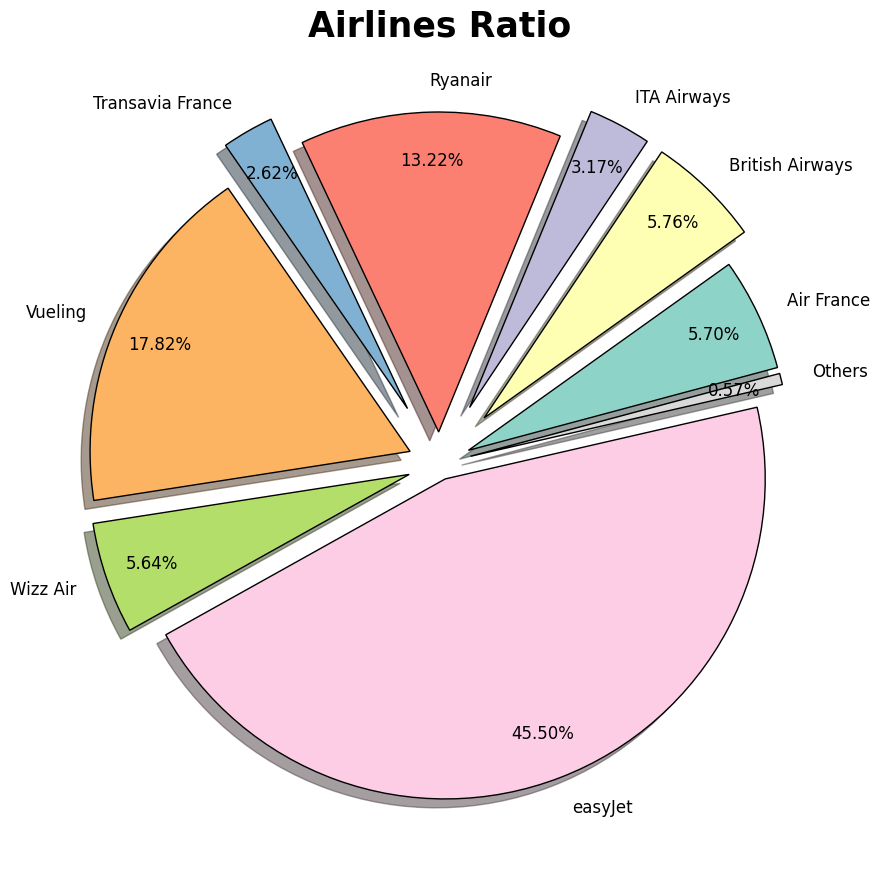

In [1516]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
airlines = grouped['Airline']
count = grouped['Count']
plt.title('Airlines Ratio', fontsize=25, fontweight='bold', pad=20)
ax.pie(count, labels = airlines, autopct='%1.2f%%', shadow=True, startangle=15, explode=(0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0.05, 0.1), textprops={'fontsize': 12}
       , colors = sns.color_palette('Set3', 9), wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, labeldistance=1.1, center=(0.5, 0.5))
plt.show()

In [1517]:
'''now we will look and search for certain factors that can determine different price policies that airlines may have'''

'now we will look and search for certain factors that can determine different price policies that airlines may have'

In [1518]:
# checking the correlation between the features and the price:
corr_test_df = df_filtered.copy()
corr_test_df.drop('Airline', axis=1, inplace=True)
correlation = corr_test_df.corr()
print(correlation['Price(NIS)'])

Price(NIS)                                1.000000
TTT                                      -0.029270
LOS                                       0.018988
Checked Bags                              0.092579
Carry-ons                                 0.274304
Onward Flight Connections                 0.030041
Return Flight Connections                 0.029287
Total Onward Flight Duration(min)         0.428570
Total Return Flight Duration(min)         0.418531
Departure Time Category_Evening           0.050348
Departure Time Category_Morning           0.005315
Departure Time Category_Night            -0.002133
Departure Time Category_Noon             -0.049832
Arrival Time Category_Evening             0.084137
Arrival Time Category_Morning            -0.035601
Arrival Time Category_Night               0.014963
Arrival Time Category_Noon               -0.065841
Return Departure Time Category_Evening    0.014394
Return Departure Time Category_Morning    0.024126
Return Departure Time Category_

In [1519]:
'''features to keep an eye on:
- Total Onward Flight Duration(min)
- Total Return Flight Duration(min)
- Carry-ons'''

'features to keep an eye on:\n- Total Onward Flight Duration(min)\n- Total Return Flight Duration(min)\n- Carry-ons'

c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-p

<Figure size 1200x800 with 0 Axes>

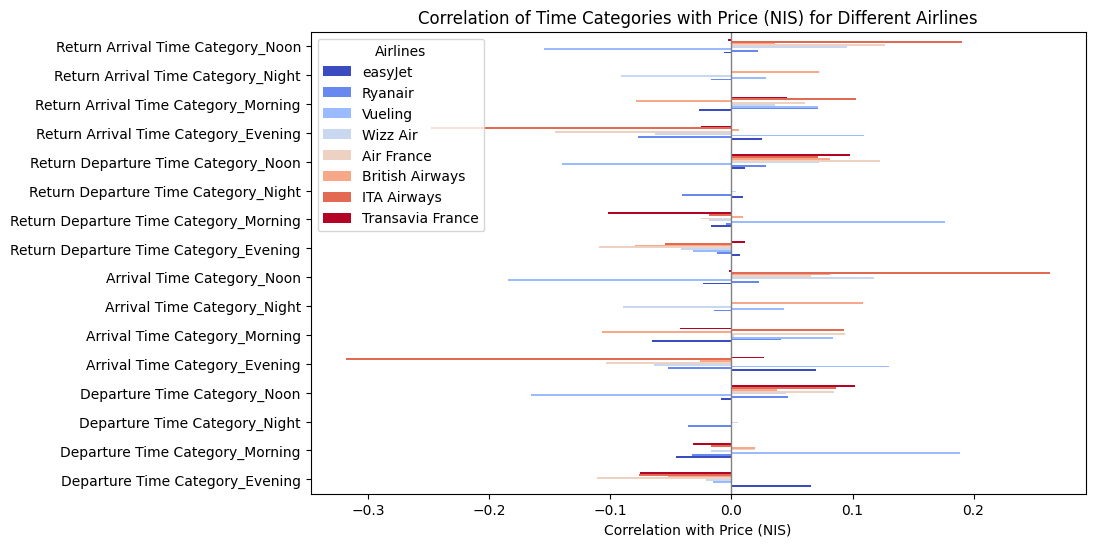

In [1520]:
# checking specificaly if the time categories have any correlation with the price
time_category_feats = [
    'Departure Time Category_Evening', 'Departure Time Category_Morning', 'Departure Time Category_Night',
    'Departure Time Category_Noon', 'Arrival Time Category_Evening', 'Arrival Time Category_Morning',
    'Arrival Time Category_Night', 'Arrival Time Category_Noon', 'Return Departure Time Category_Evening',
    'Return Departure Time Category_Morning', 'Return Departure Time Category_Night', 'Return Departure Time Category_Noon',
    'Return Arrival Time Category_Evening', 'Return Arrival Time Category_Morning', 'Return Arrival Time Category_Night',
    'Return Arrival Time Category_Noon'
]

# Function to calculate correlation for a specific airline with specific features
def calculate_correlation(airline, features):
    df_airline = corr_test_df[df_filtered['Airline'] == airline]
    return df_airline[features].corrwith(df_airline['Price(NIS)'])

# Calculate the correlations for each airline and store them
airlines = ['easyJet', 'Ryanair', 'Vueling', 'Wizz Air', 'Air France', 'British Airways', 'ITA Airways', 'Transavia France']
correlations_dict = {}

for airline in airlines:
    correlations_dict[airline] = calculate_correlation(airline, time_category_feats)

# Convert the dictionary into a DataFrame for easy visualization
correlation_df = pd.DataFrame(correlations_dict)

# Plot the correlations for each feature
plt.figure(figsize=(12, 8))
correlation_df.plot(kind='barh', figsize=(10, 6), cmap='coolwarm')
plt.xlabel('Correlation with Price (NIS)')
plt.title('Correlation of Time Categories with Price (NIS) for Different Airlines')
plt.axvline(0, color='gray', linewidth=1)  # Highlight 0 correlation line
plt.legend(title='Airlines')
plt.show()

In [1521]:
'''the corr for these features are very low (|corr| ~ 0.3 at max), so the pricing policy isn't too affected by the times of the flights'''

"the corr for these features are very low (|corr| ~ 0.3 at max), so the pricing policy isn't too affected by the times of the flights"

In [1522]:
# Drop all columns that were created by one-hot encoding
corr_test_df = corr_test_df.loc[:, ~corr_test_df.columns.str.startswith('Departure Time') & 
                                         ~corr_test_df.columns.str.startswith('Arrival Time') & 
                                         ~corr_test_df.columns.str.startswith('Return Departure Time') &
                                         ~corr_test_df.columns.str.startswith('Return Arrival Time')]
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith('Departure Time') & 
                                         ~df_filtered.columns.str.startswith('Arrival Time') & 
                                         ~df_filtered.columns.str.startswith('Return Departure Time') &
                                         ~df_filtered.columns.str.startswith('Return Arrival Time')]
correlation = correlation.loc[:, ~correlation.columns.str.startswith('Departure Time') & 
                                         ~correlation.columns.str.startswith('Arrival Time') & 
                                         ~correlation.columns.str.startswith('Return Departure Time') &
                                         ~correlation.columns.str.startswith('Return Arrival Time')]

df_filtered

,Price(NIS),Airline,TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min)
1,726,Wizz Air,1,1,0,0,0,0,150,170
2,752,Vueling,1,1,0,0,0,0,150,170
3,782,easyJet,1,1,0,0,0,0,150,165
5,782,easyJet,1,1,0,0,0,0,150,165
7,791,Wizz Air,1,1,0,0,0,0,150,175
...,...,...,...,...,...,...,...,...,...,...
539974,717,Vueling,16,3,0,0,0,0,130,115
539975,729,Air France,16,3,0,1,0,0,130,125
539976,734,easyJet,16,3,0,0,0,0,130,120
539988,750,Vueling,16,3,0,0,0,0,135,115


In [1523]:
#checking the correlation between the features and the price for each airline to decide pricing policies:
easyJet = corr_test_df[df_filtered['Airline'] == 'easyJet']
ryanair = corr_test_df[df_filtered['Airline'] == 'Ryanair']
vueling = corr_test_df[df_filtered['Airline'] == 'Vueling']
wizzAir = corr_test_df[df_filtered['Airline'] == 'Wizz Air']
airFrance = corr_test_df[df_filtered['Airline'] == 'Air France']
britishAirways = corr_test_df[df_filtered['Airline'] == 'British Airways']
itaAirways = corr_test_df[df_filtered['Airline'] == 'ITA Airways']
transavia = corr_test_df[df_filtered['Airline'] == 'Transavia France']
easyJet

,Price(NIS),TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min)
3,782,1,1,0,0,0,0,150,165
5,782,1,1,0,0,0,0,150,165
11,870,1,1,0,0,0,0,150,160
14,870,1,1,0,0,0,0,150,160
16,870,1,1,0,0,0,0,150,160
...,...,...,...,...,...,...,...,...,...
539925,651,16,3,0,0,0,0,130,120
539940,677,16,3,0,0,0,0,125,120
539961,706,16,3,0,0,0,0,130,120
539964,704,16,3,0,0,0,0,125,120


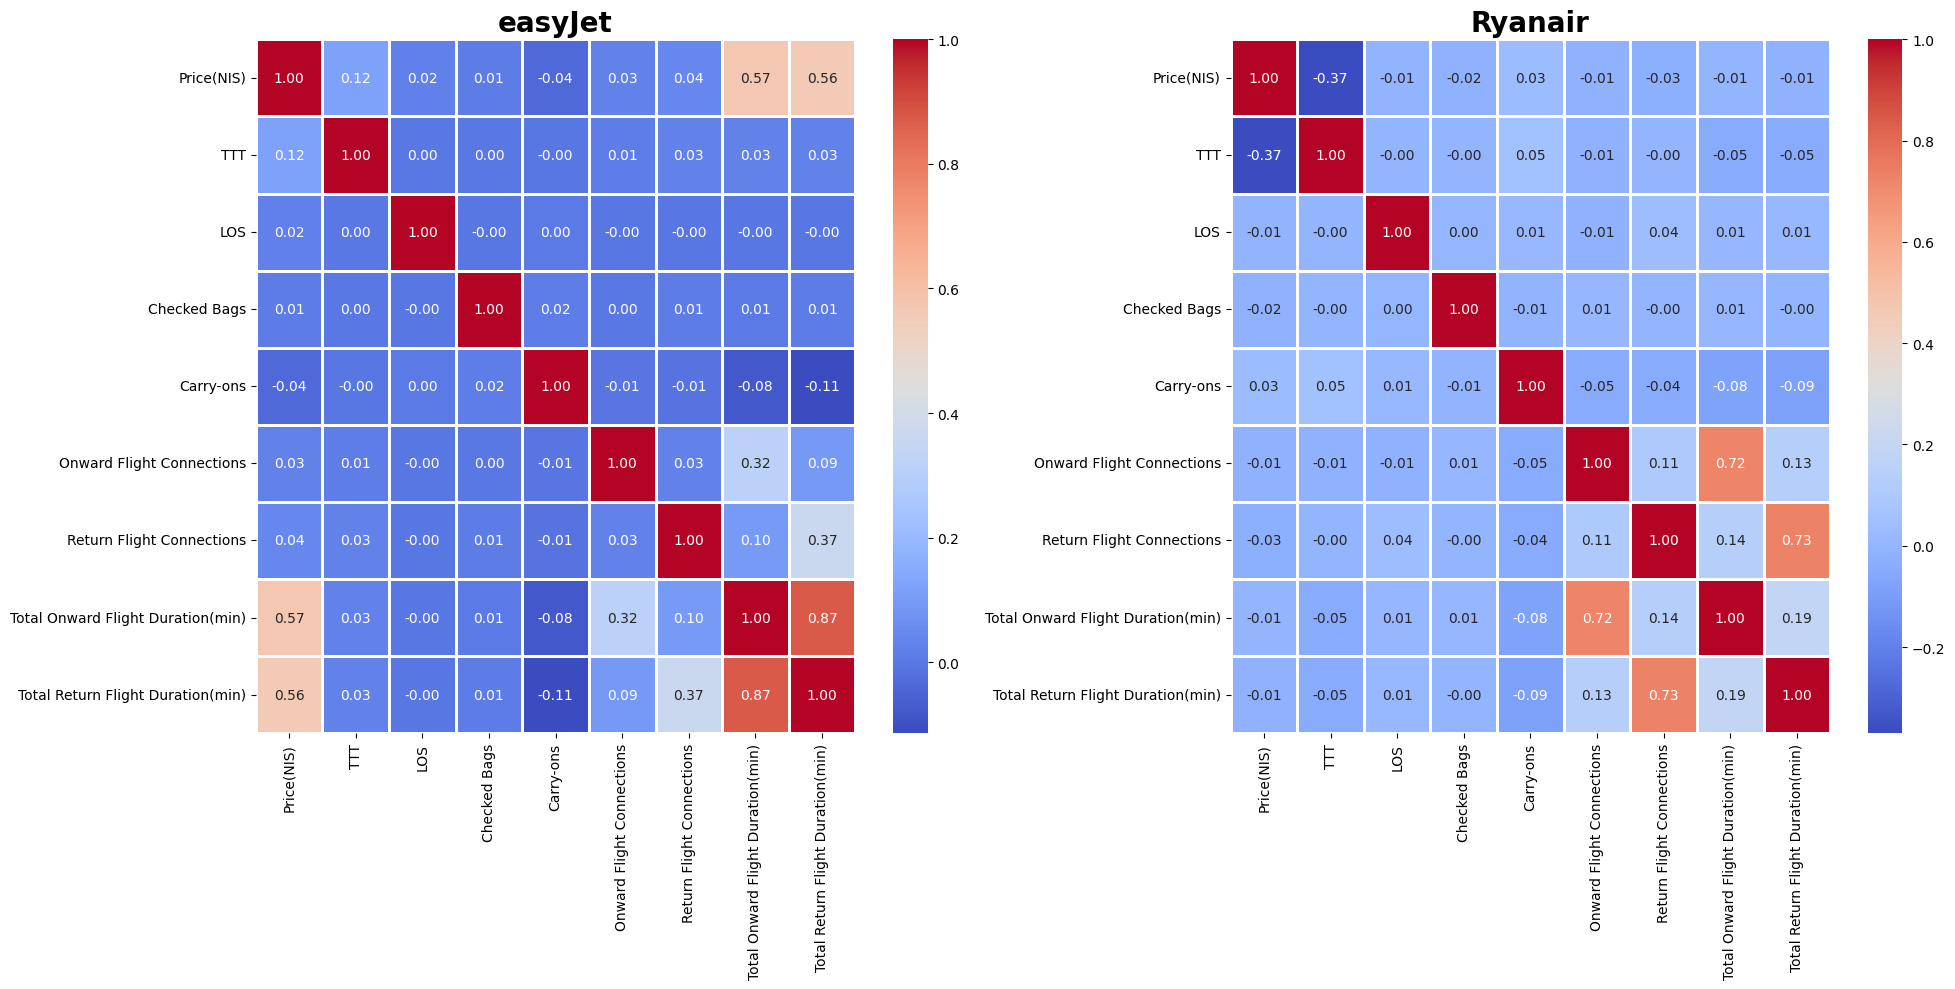

In [1524]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(easyJet.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('easyJet', fontsize=20, fontweight='bold')
sns.heatmap(ryanair.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Ryanair', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

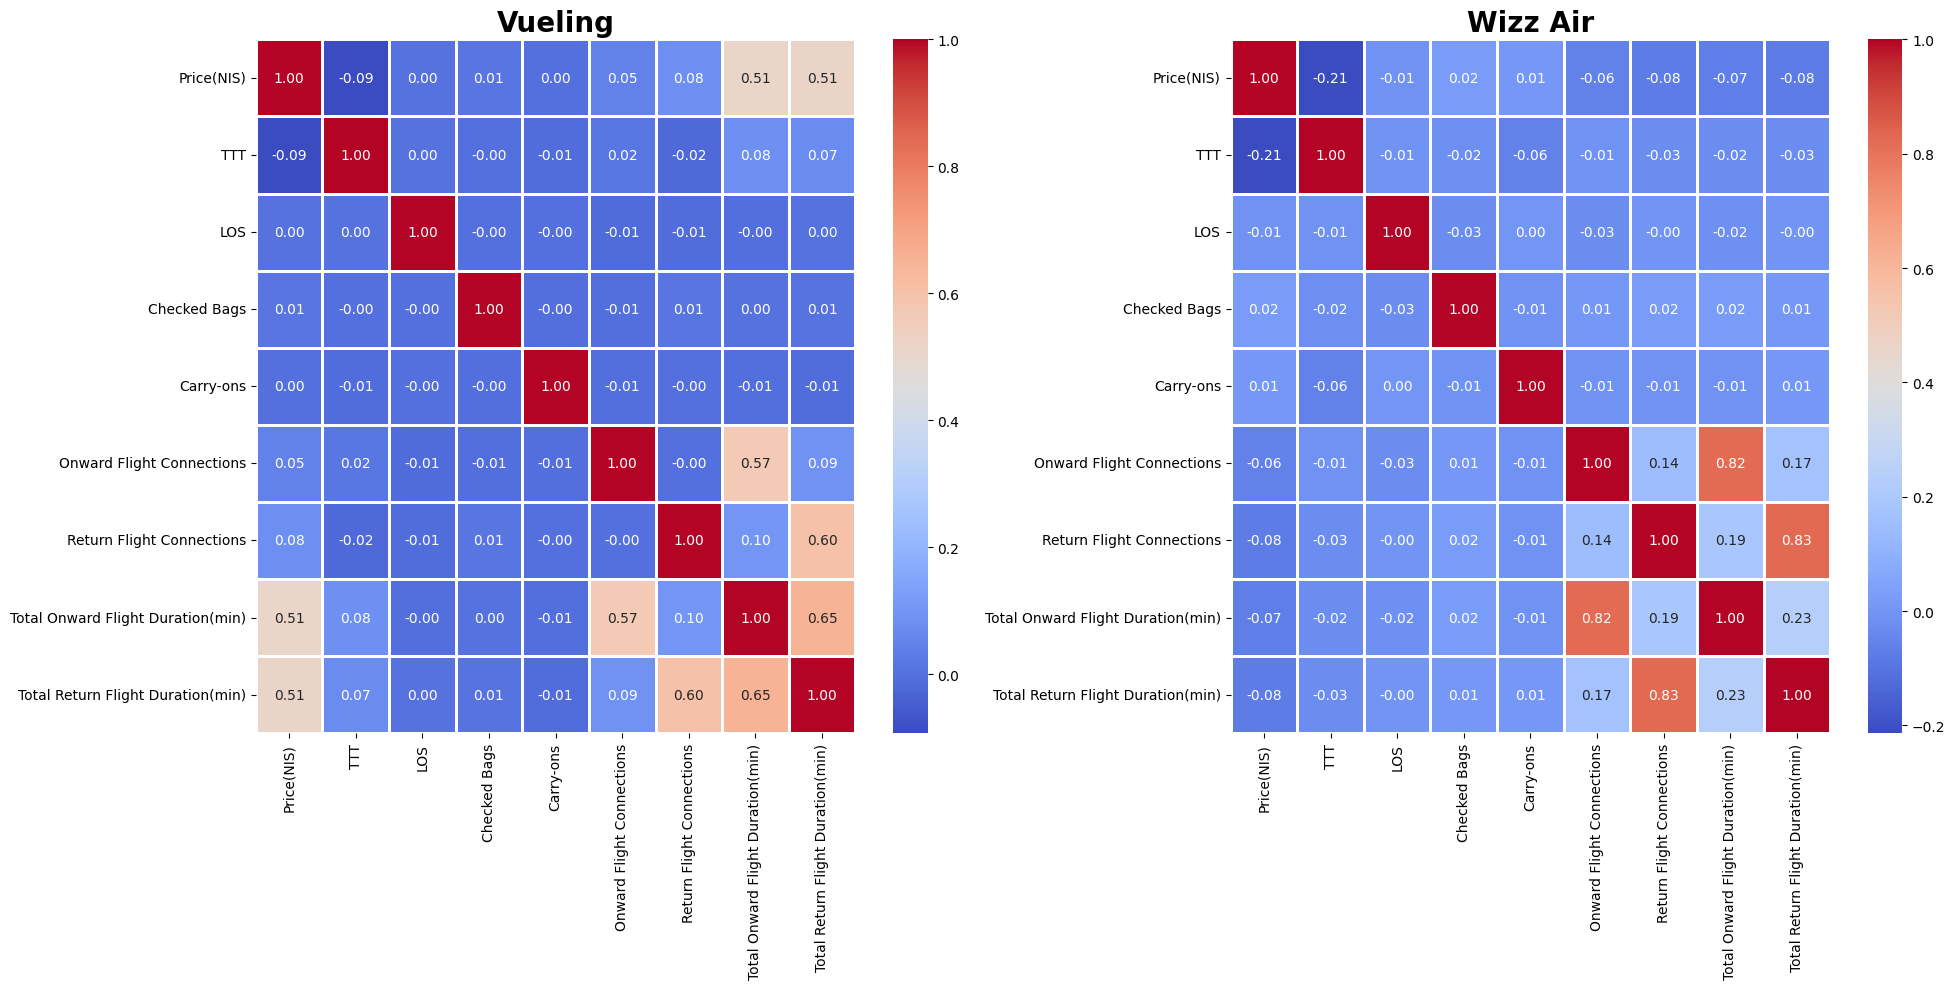

In [1525]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(vueling.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('Vueling', fontsize=20, fontweight='bold')
sns.heatmap(wizzAir.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Wizz Air', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

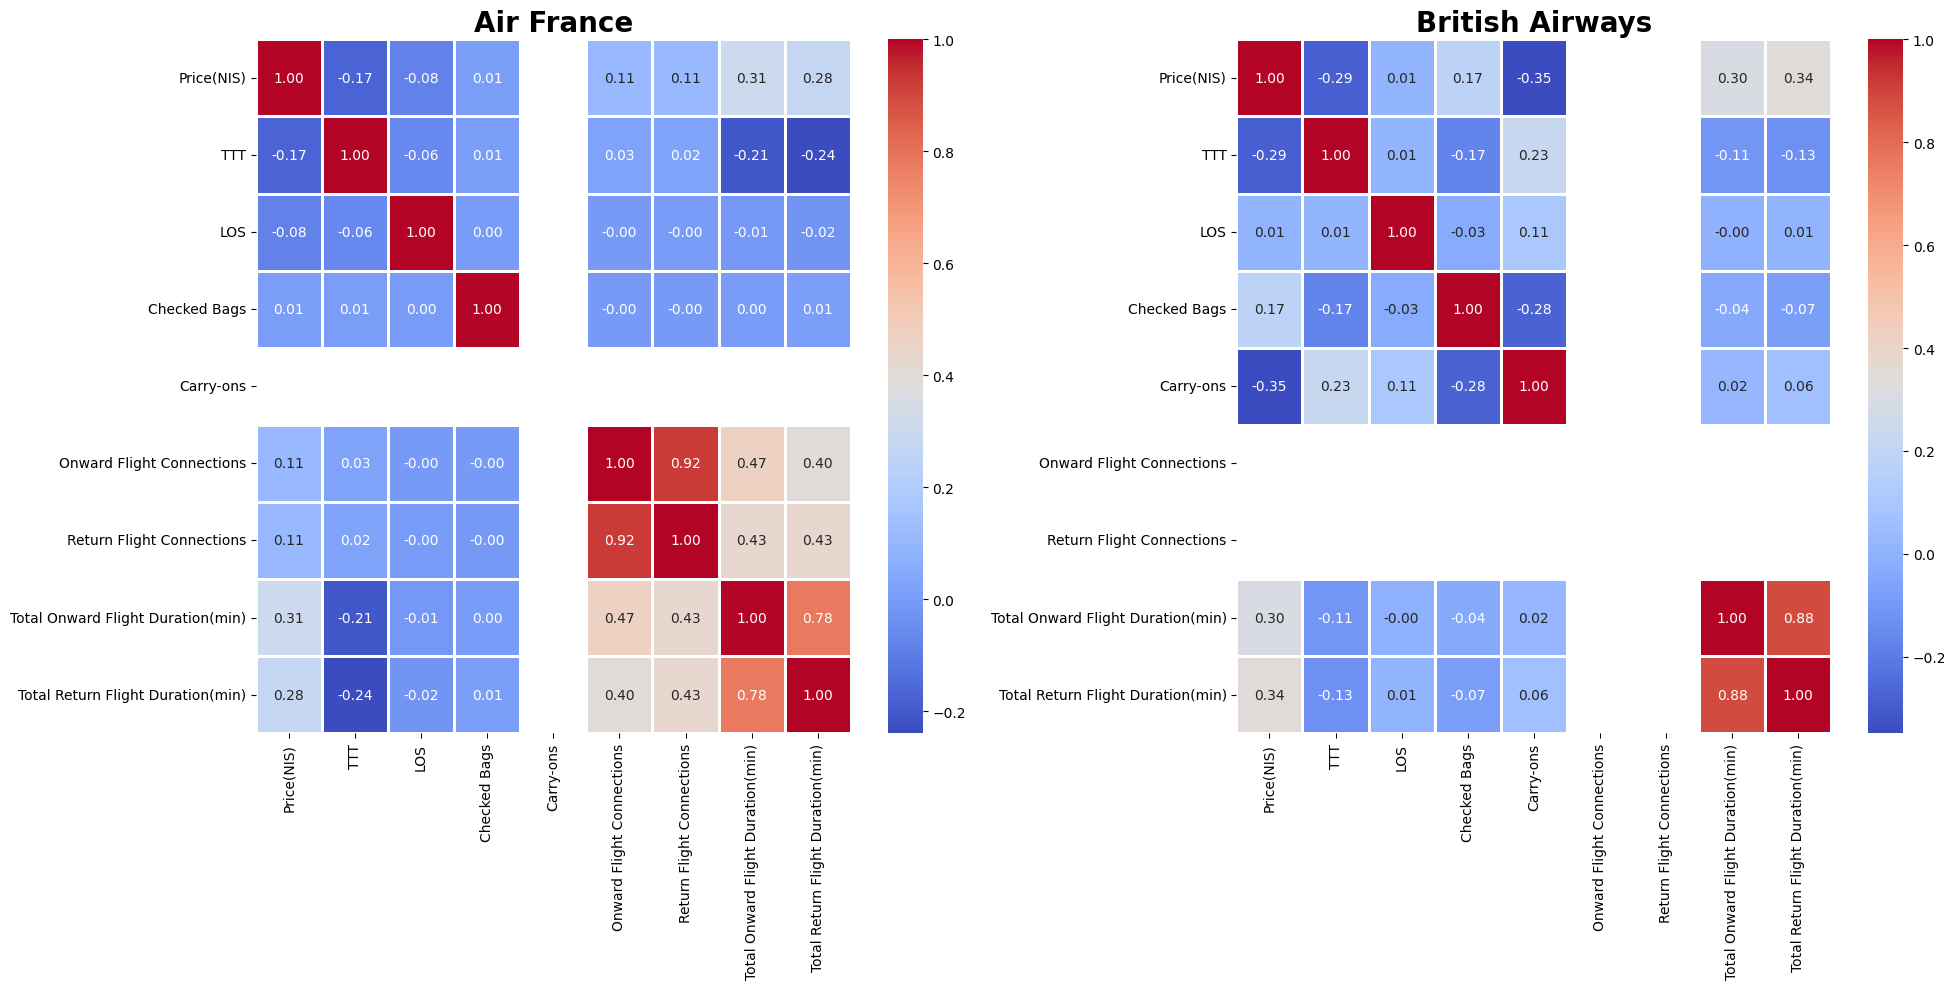

In [1526]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(airFrance.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('Air France', fontsize=20, fontweight='bold')
sns.heatmap(britishAirways.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('British Airways', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

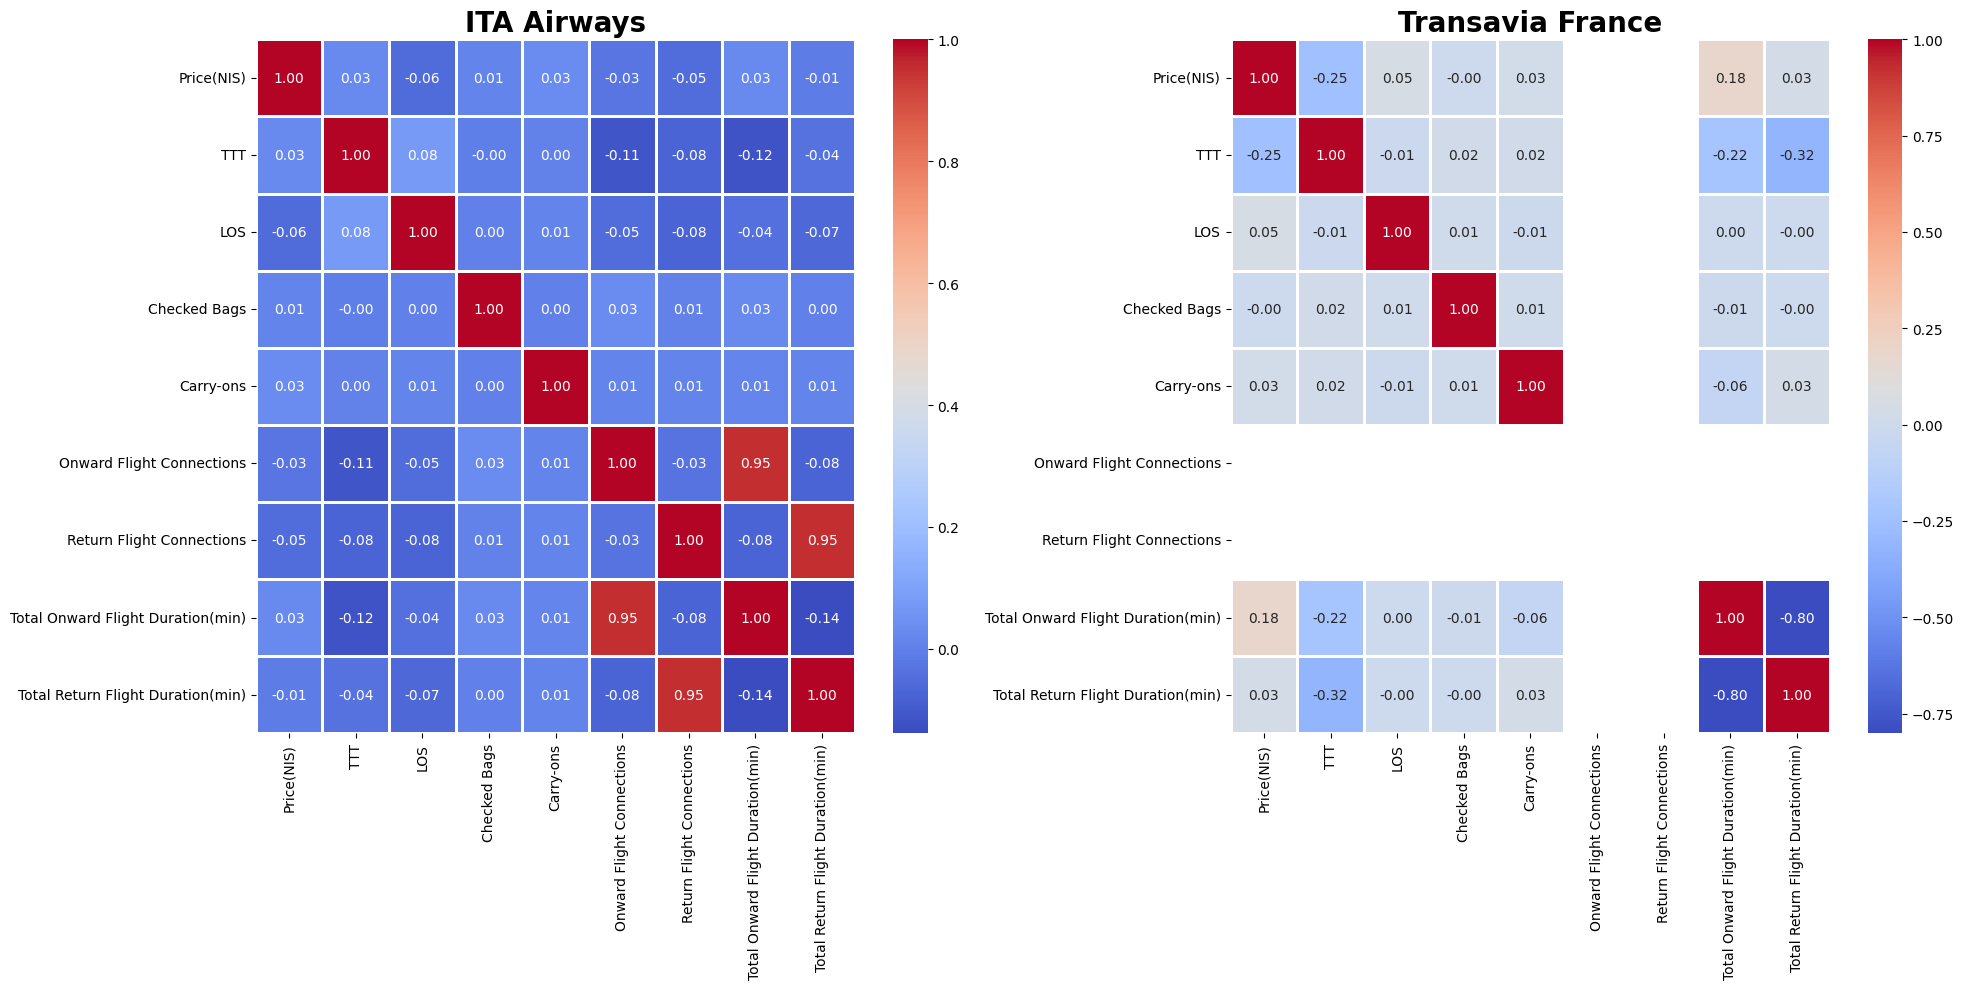

In [1527]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(itaAirways.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('ITA Airways', fontsize=20, fontweight='bold')
sns.heatmap(transavia.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Transavia France', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [1528]:
'''Metrics to consider following correlation check:
- Total Onward Flight Duration
- Total Return Flight Duration
- TTT
- LOS
- Carry-ons'''

'Metrics to consider following correlation check:\n- Total Onward Flight Duration\n- Total Return Flight Duration\n- TTT\n- LOS\n- Carry-ons'

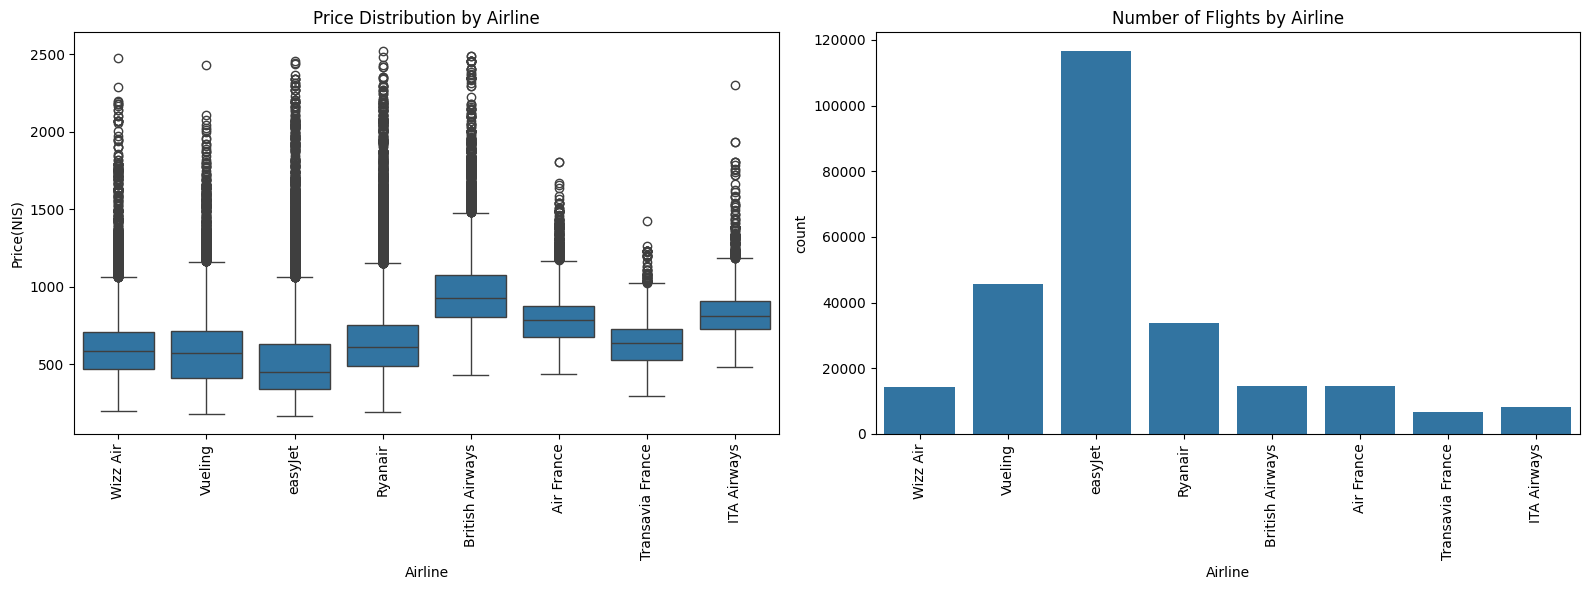

In [1529]:
'''checking the distribution of the price by airline and the number of flights by airline'''
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot price distribution by airline (box plot)
sns.boxplot(data=df_filtered, x='Airline', y='Price(NIS)', ax=axes[0])
axes[0].set_title('Price Distribution by Airline')
axes[0].tick_params(axis='x', rotation=90)  # Rotate airline names for better visibility

# Plot number of flights by airline (count plot)
sns.countplot(data=df_filtered, x='Airline', ax=axes[1])
axes[1].set_title('Number of Flights by Airline')
axes[1].tick_params(axis='x', rotation=90)  # Rotate airline names for better visibility

plt.tight_layout()
plt.show()

In [1530]:
'''a pricing policy could be the more flights an airline has, the lower the price for each flight'''
# Transavia France is an exception due to the low number of flights - can be considered as an outlier

'a pricing policy could be the more flights an airline has, the lower the price for each flight'

In [1531]:
'''also check:
avg price per airline
price variance/std-v per each airline
'''

'also check:\navg price per airline\nprice variance/std-v per each airline\n'

In [1532]:
# These are the main features that we beleive dictate the pricing policy of different airlines:
df_cluster = df_filtered.groupby('Airline').agg(
    avgOnwardFlightDurationMin = ('Total Onward Flight Duration(min)', 'mean'),
    avgReturnFlightDurationMin= ('Total Return Flight Duration(min)', 'mean'),
    avgTTT = ('TTT', 'mean'),
    avgLOS = ('LOS', 'mean'),
    avgCarryOns = ('Carry-ons', 'mean'),
    avgPrice = ('Price(NIS)', 'mean'),
    priceStd = ('Price(NIS)', 'std'),
    flightsCount = ('Price(NIS)', 'count')
)
df_cluster

,avgOnwardFlightDurationMin,avgReturnFlightDurationMin,avgTTT,avgLOS,avgCarryOns,avgPrice,priceStd,flightsCount
Airline,,,,,,,,
Air France,126.641203,125.659085,12.590778,3.425459,1.000000,790.478556,152.230928,14596
British Airways,151.795402,151.562797,19.837447,2.980537,0.683982,961.606537,247.473299,14746
ITA Airways,133.514064,132.471626,14.018628,2.975574,0.998273,826.501234,147.983077,8106
Ryanair,155.113542,154.529102,15.498389,3.017115,0.189423,655.890774,259.386501,33829
Transavia France,128.189758,128.599582,19.862347,2.978053,0.986115,634.129143,147.219681,6698
Vueling,112.293251,112.993556,14.818798,2.953291,0.003419,576.935975,208.802244,45623
Wizz Air,156.940118,158.275182,14.880097,3.015715,0.007477,615.469851,223.048228,14445
easyJet,89.247512,89.464312,15.497952,2.995072,0.081955,500.776666,211.983049,116467


In [1533]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'avgOnwardFlightDurationMin'),
  Text(1, 0, 'avgReturnFlightDurationMin'),
  Text(2, 0, 'avgTTT'),
  Text(3, 0, 'avgLOS'),
  Text(4, 0, 'avgCarryOns'),
  Text(5, 0, 'avgPrice'),
  Text(6, 0, 'priceStd'),
  Text(7, 0, 'flightsCount')])

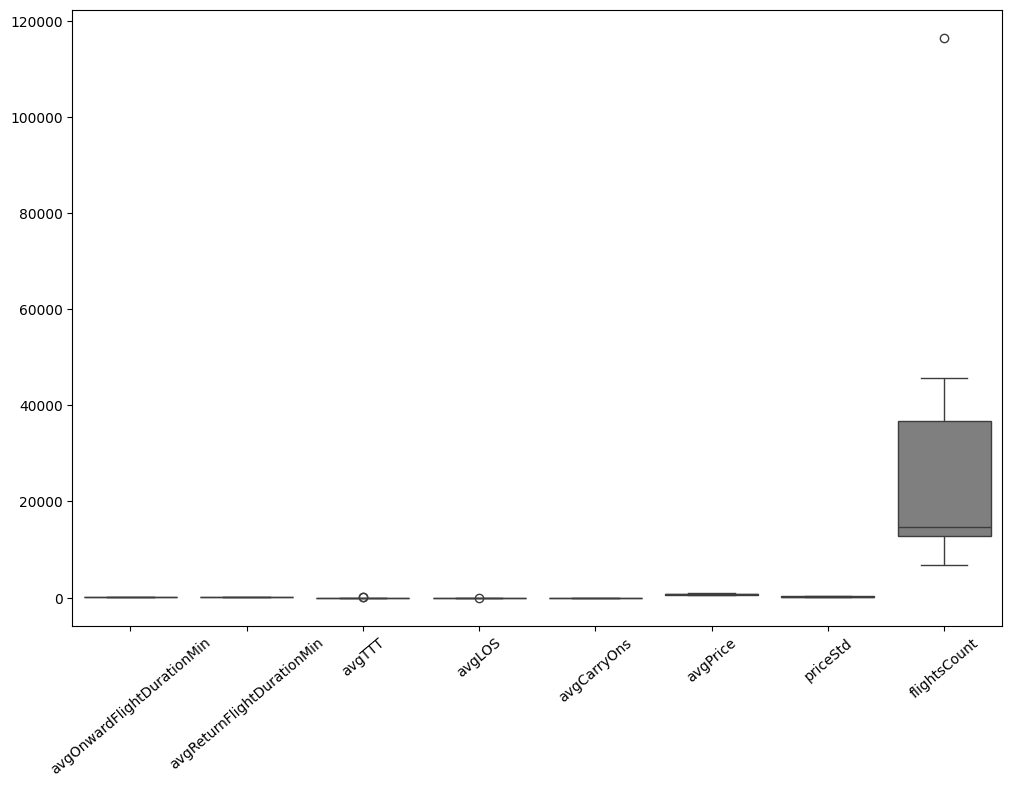

In [1534]:
# checking for outliers
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster)
plt.xticks(rotation=40)

([0], [Text(0, 0, '')])

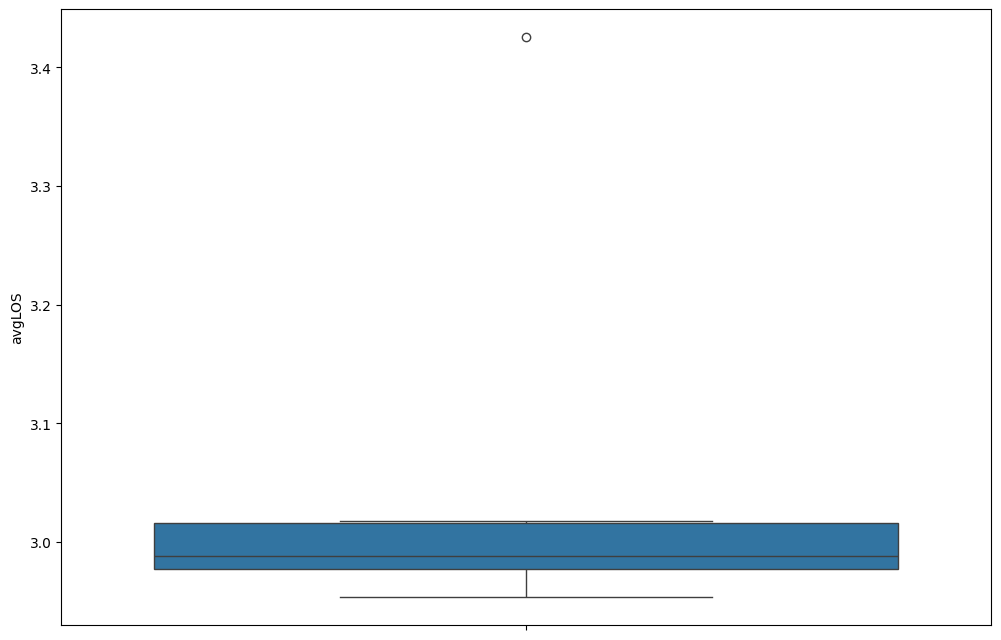

In [1535]:
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster['avgLOS'])
plt.xticks(rotation=40)

([0], [Text(0, 0, '')])

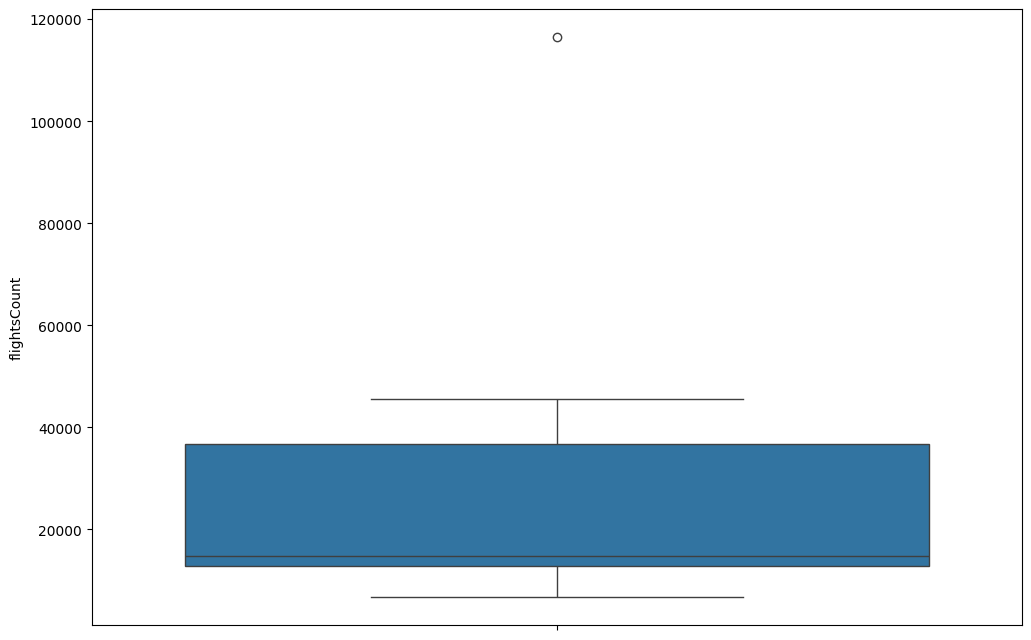

In [1536]:
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster['flightsCount'])
plt.xticks(rotation=40)

In [1537]:
outliers = []
for feature in df_cluster.columns:
    Q1 = np.percentile(df_cluster[feature],25)
    Q3 = np.percentile(df_cluster[feature],75)
    step = (Q3-Q1)*1.5
    outliers_pts = df_cluster[~((df_cluster[feature]>=Q1-step) & (df_cluster[feature]<=Q3+step))]
    outliers.extend(outliers_pts.index)

    print('Airlines considered outliers for the feature %s are:' %feature)
    print(outliers_pts.index)
    print()

Airlines considered outliers for the feature avgOnwardFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgReturnFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgTTT are:
Index(['British Airways', 'Transavia France'], dtype='object', name='Airline')

Airlines considered outliers for the feature avgLOS are:
Index(['Air France'], dtype='object', name='Airline')

Airlines considered outliers for the feature avgCarryOns are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgPrice are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature priceStd are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature flightsCount are:
Index(['easyJet'], dtype='object', name='Airline')



In [1538]:
'''there is a clear indication that Air France and easyJet may have a different pricing policy for avg LOS and total number of flights,
also British Airways and Transavia France might be using the same policy for the TTT
we will look into this later'''
# we will only remove outliers that are outliers in at least 2 different features, so in our case there is non to remove

'there is a clear indication that Air France and easyJet may have a different pricing policy for avg LOS and total number of flights,\nalso British Airways and Transavia France might be using the same policy for the TTT\nwe will look into this later'

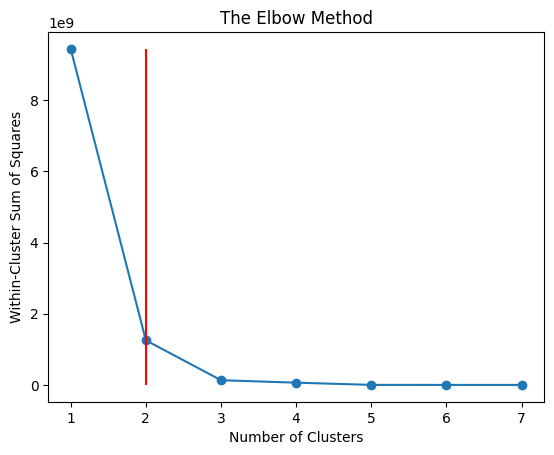

In [1539]:
# checking the elbow method to determine the best number of k's for clustering
wcss1 = []
for i in range(1,8):
    kmeans1 = KMeans(n_clusters=i, n_init=10).fit(df_cluster)
    wcss1.append(kmeans1.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss1,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss1,marker='o')
plt.vlines(k_elbow,np.min(wcss1),np.max(wcss1),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

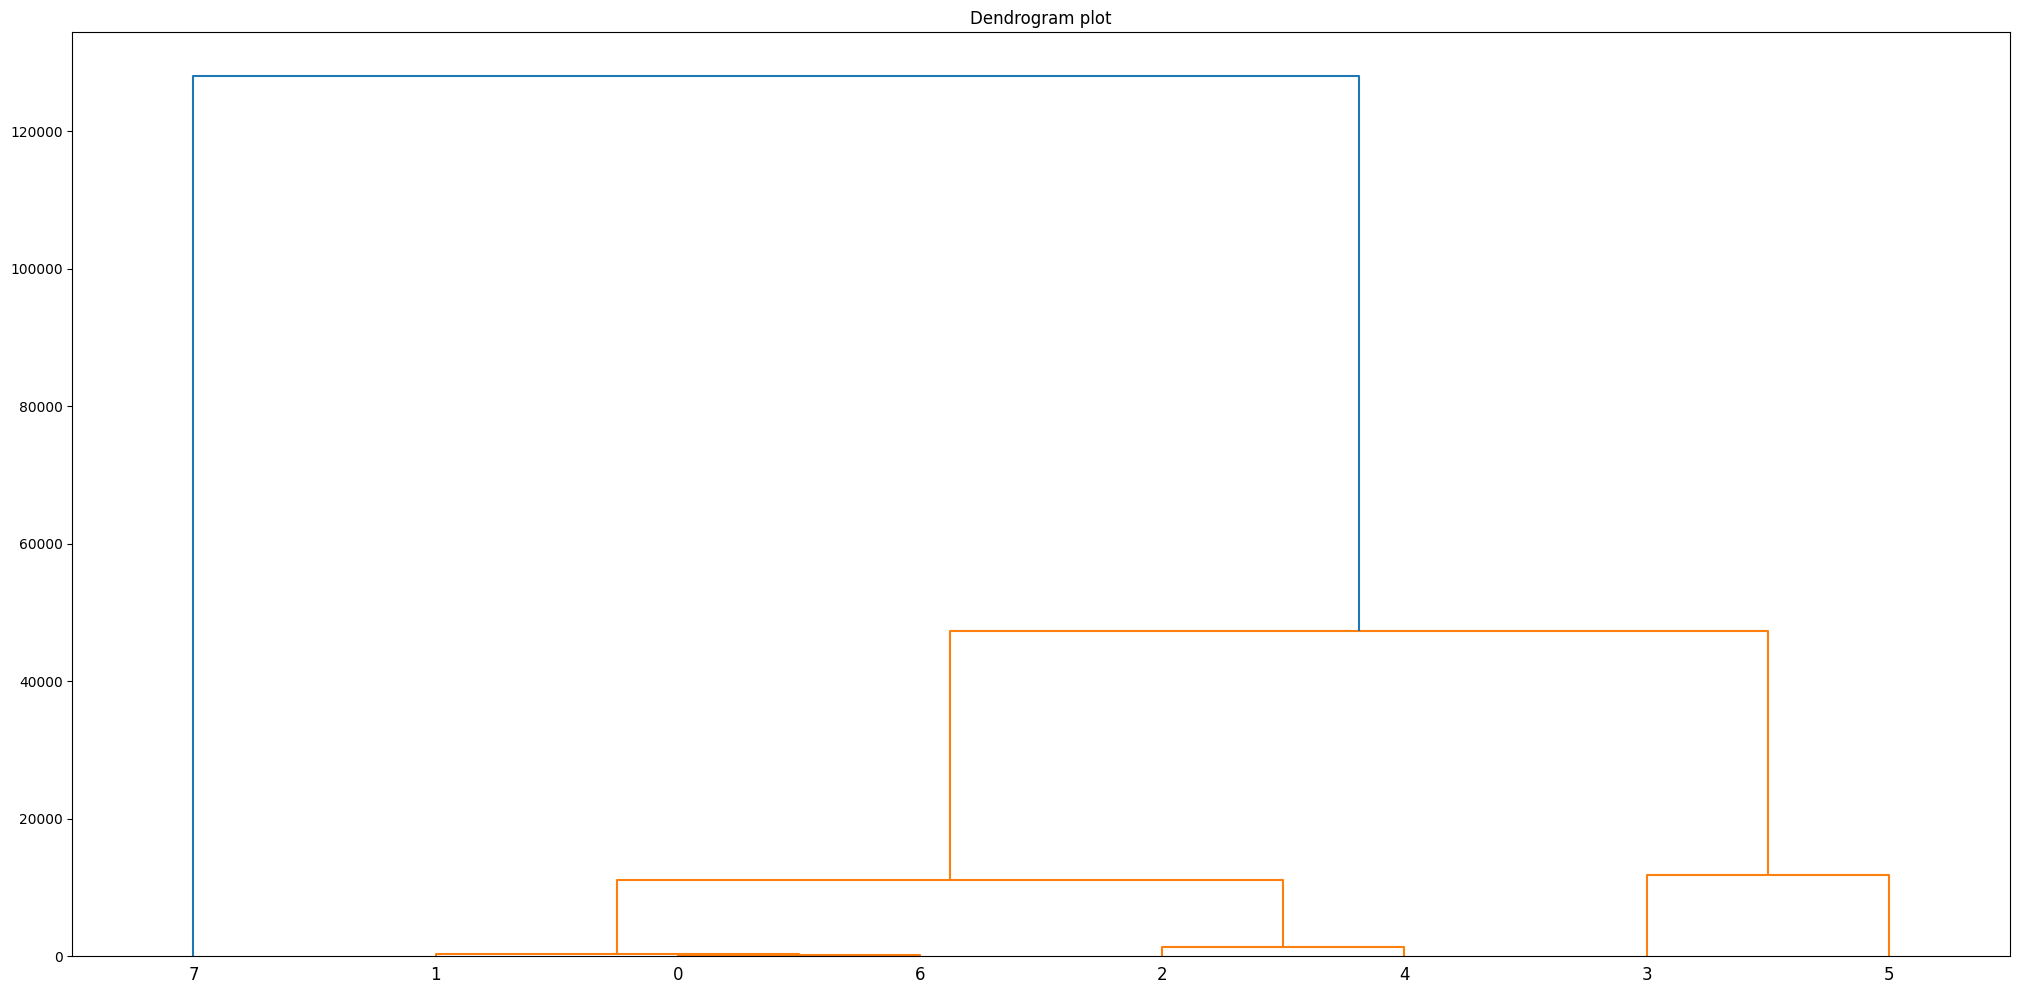

In [1540]:
# checking the dendrogram to see how the clusters merge (rule of thumb - go to the longest branch from the top and go up a bit until there is a clear slice of the tree)
plt.figure(figsize=(25,12))
dendrogram1=sch.dendrogram(sch.linkage(df_cluster,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [1541]:
# checking silhouette score to see how well seperated the clusters are from each other and also how similar points, within a cluster, are
for i in range(2,8):
    X1 = df_cluster.values
    kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans1 = kmeans1.fit_predict(X1)
    print(f'{i} clusters silhouette score is {silhouette_score(X1,y_kmeans1)}')

2 clusters silhouette score is 0.7172931252538719
3 clusters silhouette score is 0.6643490032847038
4 clusters silhouette score is 0.6844001809388098
5 clusters silhouette score is 0.5585648782362066
6 clusters silhouette score is 0.3566109274439819
7 clusters silhouette score is 0.059921355565520314


In [1542]:
# clustering
X1 = df_cluster.values
labels = df_cluster.index

num_of_clusters = 2

kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X1)

# dimension reduction
pca = PCA(n_components=2)
X1 = pca.fit_transform(X1)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99987991e-01, 1.03059295e-05])

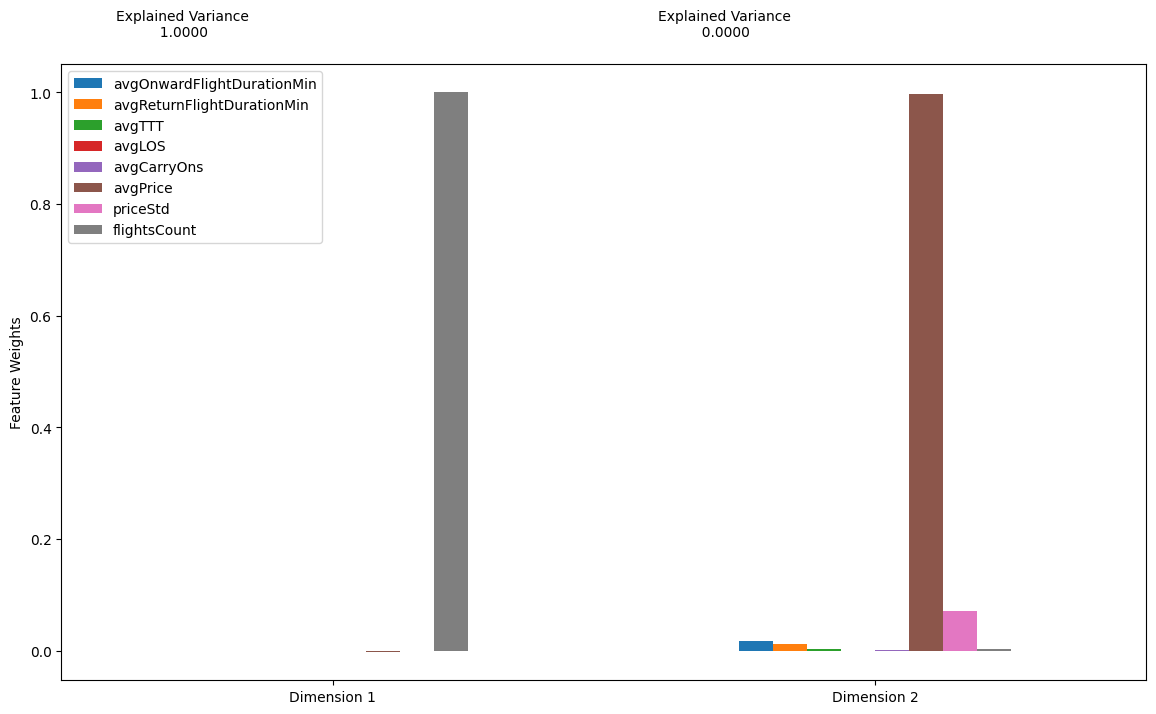

In [1543]:
# seeing the weight of each feature in each dimension
pca_results = vs.pca_results(df_cluster,pca)

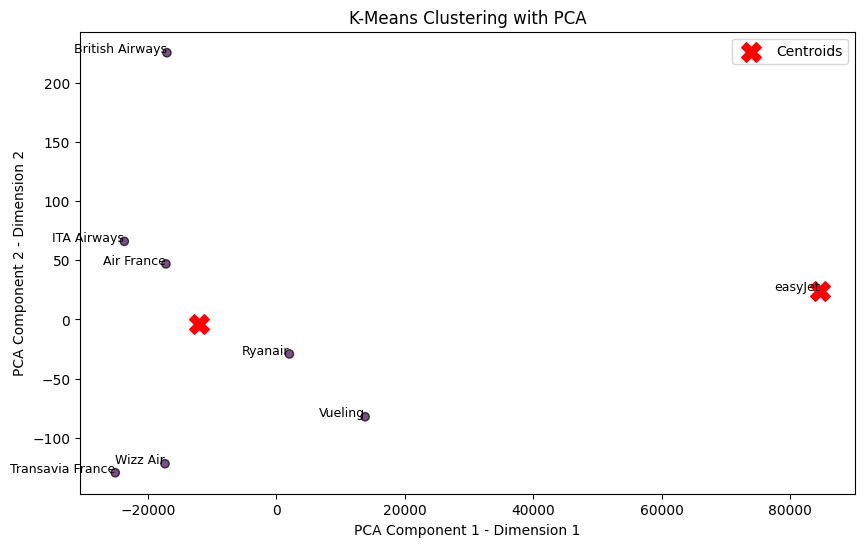

In [1544]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels to each data point
for i, txt in enumerate(labels):
    ax.text(X1[i, 0], X1[i, 1], txt, fontsize=9, ha='right', color='black')

# Labels and title
ax.set_title("K-Means Clustering with PCA")
ax.set_xlabel("PCA Component 1 - Dimension 1")
ax.set_ylabel("PCA Component 2 - Dimension 2")
ax.legend()

plt.show()

In [1545]:
'''should probably scale the data so that the features have the same weight instead of 2 dominant features'''

'should probably scale the data so that the features have the same weight instead of 2 dominant features'

In [1546]:
# scaling the data to Z (mean = 0, std = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
print(df_scaled)

[[-0.23260797 -0.27683122 -1.3379202   2.62099494  1.15799144  0.67206684
  -1.12409487 -0.50114261]
 [ 0.92016333  0.91133374  1.61371616 -0.42488903  0.43502013  1.87945214
   1.12817351 -0.49677669]
 [ 0.08236276  0.03564997 -0.75634355 -0.4588682   1.15404023  0.92622313
  -1.22454701 -0.6900416 ]
 [ 1.07222764  1.04739379 -0.15362309 -0.17447756 -0.69640894 -0.27751082
   1.40989403  0.05865619]
 [-0.16164051 -0.14195496  1.62385797 -0.44189382  1.12622657 -0.43104897
  -1.24259962 -0.73102308]
 [-0.89014857 -0.8577803  -0.43042706 -0.61141193 -1.12194027 -0.83457263
   0.21368984  0.40193426]
 [ 1.15593631  1.21922092 -0.40545924 -0.18406667 -1.11265815 -0.56269871
   0.55057539 -0.50553764]
 [-1.94629298 -1.93703193 -0.15380098 -0.32538773 -0.94227099 -1.37191099
   0.28890873  2.46393118]]


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

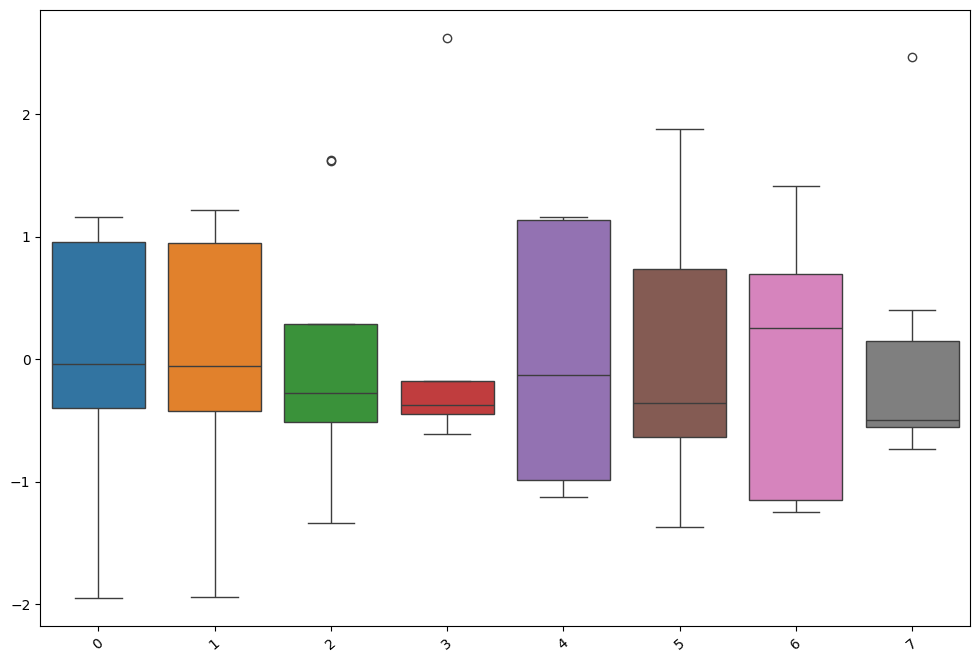

In [1547]:
plt.figure(figsize=(12,8))
sns.boxplot(df_scaled)
plt.xticks(rotation=40)

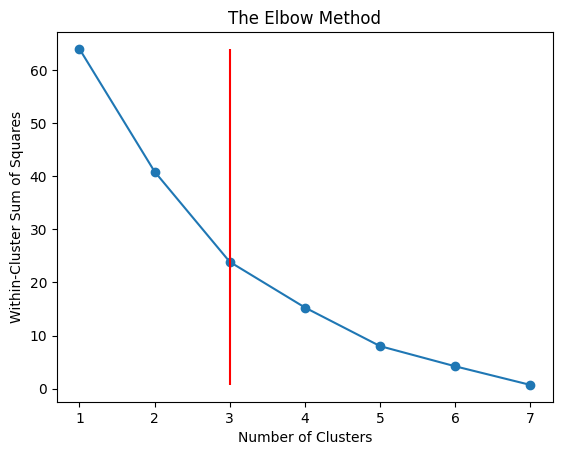

In [1548]:
wcss2 = []
for i in range(1,8):
    kmeans2 = KMeans(n_clusters=i, n_init=10).fit(df_scaled)
    wcss2.append(kmeans2.inertia_)

k_elbow = KneeLocator(x = range(1,8),y=wcss2,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss2,marker='o')
plt.vlines(k_elbow,np.min(wcss2),np.max(wcss2),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

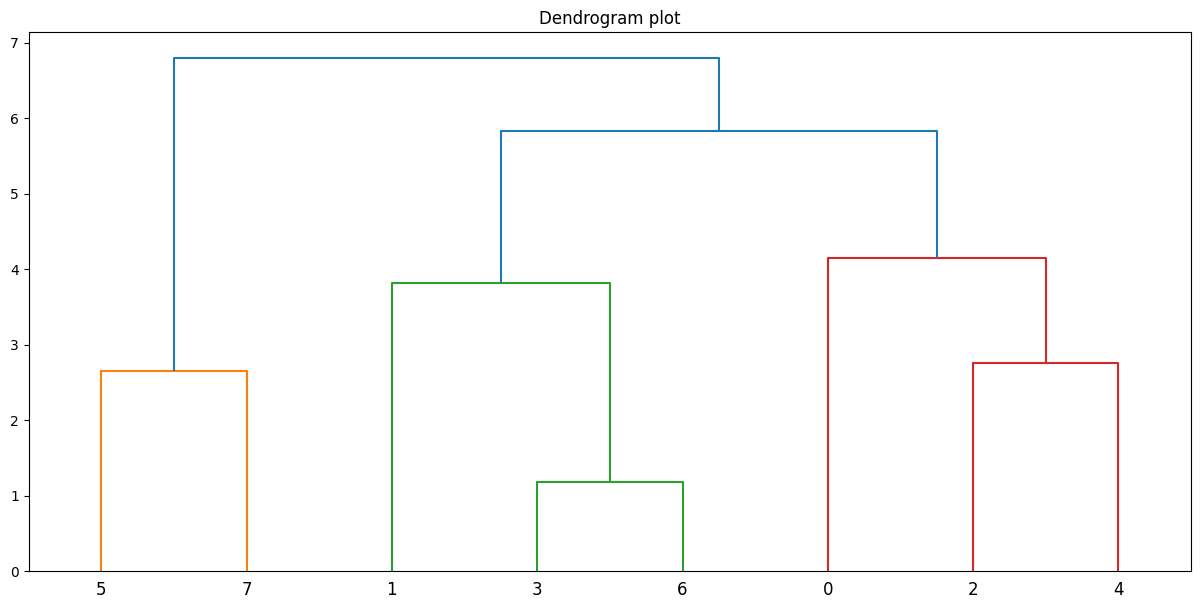

In [1549]:
plt.figure(figsize=(15,7))
dendrogram2=sch.dendrogram(sch.linkage(df_scaled,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [1550]:
for i in range(2, 8):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans2 = kmeans2.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, y_kmeans2)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.18867726313413494
3 clusters silhouette score is 0.3057366471047615
4 clusters silhouette score is 0.269829287201651
5 clusters silhouette score is 0.2906500196043267
6 clusters silhouette score is 0.24125445562301073
7 clusters silhouette score is 0.1542473096849511


In [1551]:
# clustering
X2 = df_scaled
labels = df_cluster.index

num_of_clusters = 3

kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X2)

# dimension reduction
pca = PCA(n_components=2)
X2 = pca.fit_transform(X2)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.42265761, 0.29299273])

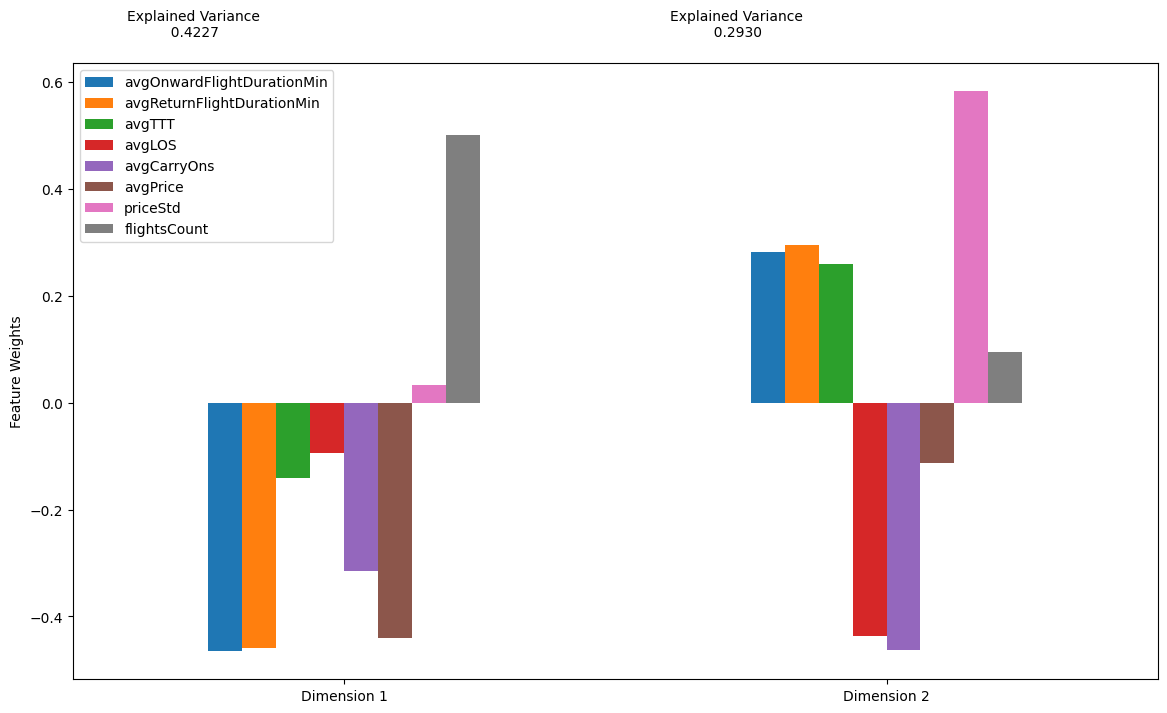

In [1552]:
df_scaled_df = pd.DataFrame(df_scaled, columns=df_cluster.columns)
pca_results = vs.pca_results(df_scaled_df,pca)

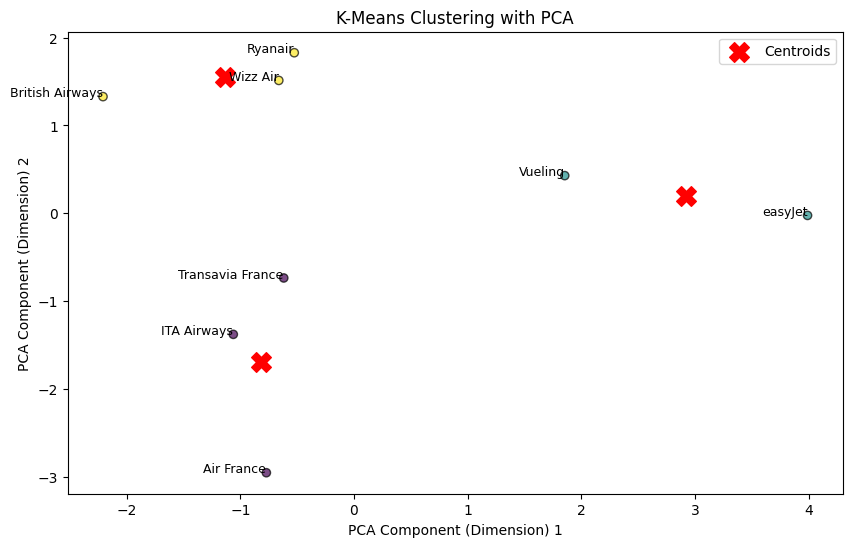

In [1553]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels to each data point
for i, txt in enumerate(labels):
    ax.text(X2[i, 0], X2[i, 1], txt, fontsize=9, ha='right', color='black')

# Labels and title
ax.set_title("K-Means Clustering with PCA")
ax.set_xlabel("PCA Component (Dimension) 1")
ax.set_ylabel("PCA Component (Dimension) 2")
ax.legend()

plt.show()

In [1554]:
''' It is difficult to understand the relationships due to the dimension reduction, so we will break it down into different categories to try to understand them.
Because the weight of flights count is very low in the pca, we will look at it individually first'''

' It is difficult to understand the relationships due to the dimension reduction, so we will break it down into different categories to try to understand them.\nBecause the weight of flights count is very low in the pca, we will look at it individually first'

In [1555]:
df_cluster.iloc[:, [5,7]]

,avgPrice,flightsCount
Airline,,
Air France,790.478556,14596
British Airways,961.606537,14746
ITA Airways,826.501234,8106
Ryanair,655.890774,33829
Transavia France,634.129143,6698
Vueling,576.935975,45623
Wizz Air,615.469851,14445
easyJet,500.776666,116467


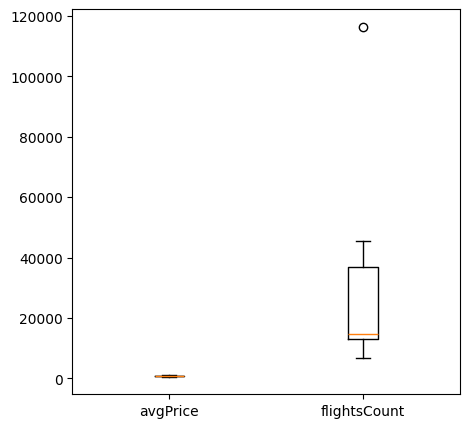

In [1556]:
# taking only the neccessary columns and checking if scaling is needed
flight_count_data = df_cluster.iloc[:, [5,7]]
plt.figure(figsize=(5,5))
display_data = [flight_count_data['avgPrice'],flight_count_data['flightsCount']]
plt.boxplot(display_data)
plt.xticks(range(1,3),flight_count_data.keys())
plt.show()

In [1557]:
# we scale because the features are in different scales from one another
flight_count_data_scaled = scaler.fit_transform(flight_count_data)

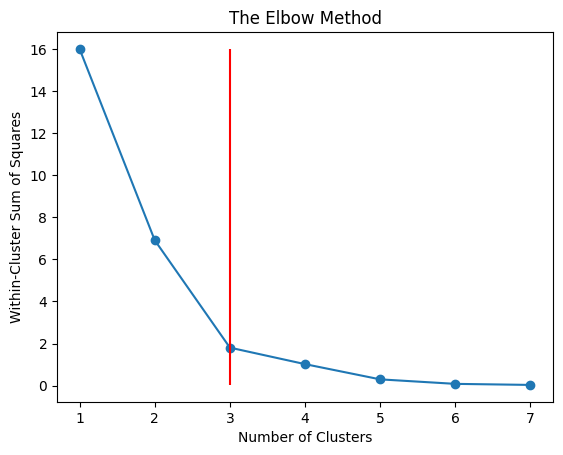

In [1558]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_count_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [1559]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_count_data_scaled)
    score = silhouette_score(flight_count_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.4997432672426835
3 clusters silhouette score is 0.48259518248192224
4 clusters silhouette score is 0.41695044073717924
5 clusters silhouette score is 0.41197917478385815
6 clusters silhouette score is 0.33119369532798343
7 clusters silhouette score is 0.15780101153925297


In [1560]:
X = flight_count_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

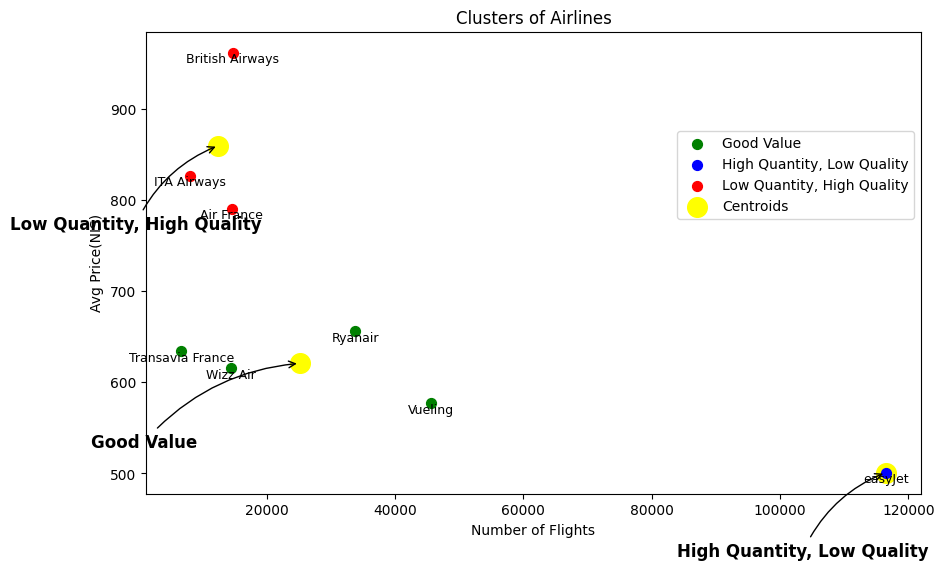

In [1561]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Good Value', 'High Quantity, Low Quality', 'Low Quantity, High Quality']
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,0], s = 50, c = 'green', label= 'Good Value',zorder=3)
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,0], s = 50, c = 'blue', label= 'High Quantity, Low Quality',zorder=3)
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2,0], s = 50, c = 'red', label= 'Low Quantity, High Quality',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 1], kmeans.cluster_centers_[: ,0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Number of Flights')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_count_data.index):
    plt.text(X[i, 1], X[i, 0], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]):
    plt.annotate(label, xy=(x,y), xytext=(-150,-50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [1562]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

In [1563]:
'''The correlation between the avg price and the number of flights indicates a relatively strong connection.
As seen earlier, easyJet was considered an outlier due to the high number of flights. now we can also see that their avg Price is the lowest, indicating that
their policy could be to offer cheap flights but at a large volume, it is very different to the first cluster policy who we can infer offer higher quality/ more luxerious
flights due to their price being higher and lower volumes of flights'''

'The correlation between the avg price and the number of flights indicates a relatively strong connection.\nAs seen earlier, easyJet was considered an outlier due to the high number of flights. now we can also see that their avg Price is the lowest, indicating that\ntheir policy could be to offer cheap flights but at a large volume, it is very different to the first cluster policy who we can infer offer higher quality/ more luxerious\nflights due to their price being higher and lower volumes of flights'

In [1564]:
'''next we will check to see how different airlines vary their prices'''

'next we will check to see how different airlines vary their prices'

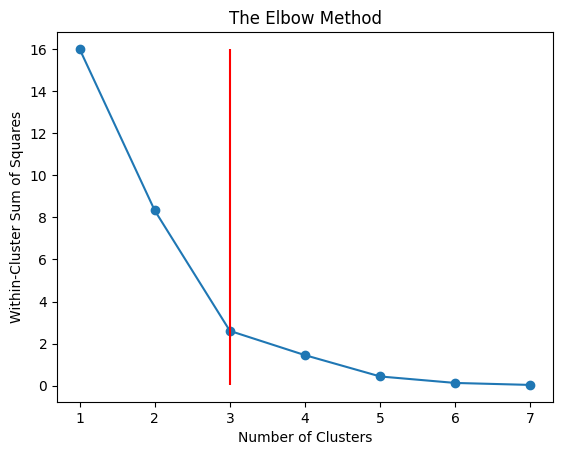

In [1565]:
df_cluster.iloc[:, [5,6]]
flight_priceSTD_data = df_cluster.iloc[:, [5,6]]
flight_priceSTD_data_scaled = scaler.fit_transform(flight_priceSTD_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_priceSTD_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [1566]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_priceSTD_data_scaled)
    score = silhouette_score(flight_priceSTD_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.4259320708965401
3 clusters silhouette score is 0.4993402933508002
4 clusters silhouette score is 0.3880111363832406
5 clusters silhouette score is 0.3786737056015437
6 clusters silhouette score is 0.2806816587533144
7 clusters silhouette score is 0.19404289041620643


In [1567]:
X = flight_priceSTD_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

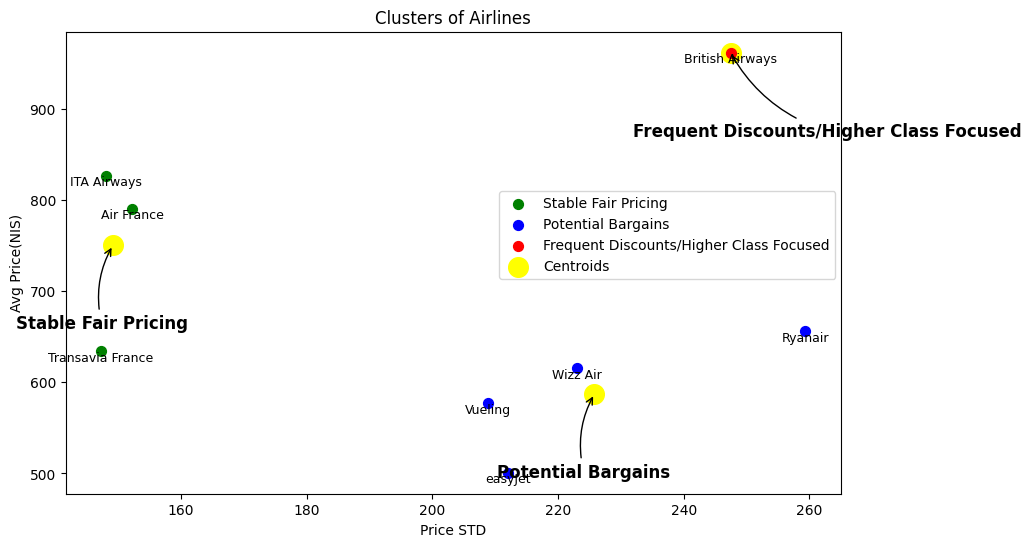

In [1568]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Stable Fair Pricing', 'Potential Bargains', 'Frequent Discounts/Higher Class Focused']
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,0], s = 50, c = 'green', label= 'Stable Fair Pricing',zorder=3)
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,0], s = 50, c = 'blue', label= 'Potential Bargains',zorder=3)
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2,0], s = 50, c = 'red', label= 'Frequent Discounts/Higher Class Focused',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 1], kmeans.cluster_centers_[: ,0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Price STD')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_priceSTD_data.index):
    plt.text(X[i, 1], X[i, 0], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]):
    plt.annotate(label, xy=(x,y), xytext=(-70,-50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[0.55,0.45])
plt.show()

In [1569]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

In [1570]:
'''We can clearly see the different strategies the airlines have when it comes to varrying the prices
however the price is not very related to its own deviation so not very accurate'''

'We can clearly see the different strategies the airlines have when it comes to varrying the prices\nhowever the price is not very related to its own deviation so not very accurate'

In [1571]:
'''Next we will check how the flight duration dictates each airlines pricing'''

'Next we will check how the flight duration dictates each airlines pricing'

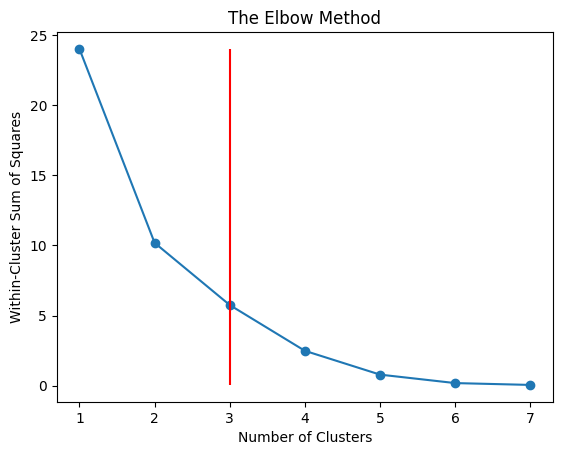

In [1572]:
flight_duration_data = df_cluster.iloc[:, [0,1,5]]
flight_duration_data_scaled = scaler.fit_transform(flight_duration_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_duration_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [1573]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_duration_data_scaled)
    score = silhouette_score(flight_duration_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.19141944217680978
3 clusters silhouette score is 0.24039496161560786
4 clusters silhouette score is 0.3183294879572715
5 clusters silhouette score is 0.4279869206007533
6 clusters silhouette score is 0.3490975306889603
7 clusters silhouette score is 0.20246053958072824


In [1574]:
# dimension reduction
pca = PCA(n_components=2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.91862359, 0.08137641])

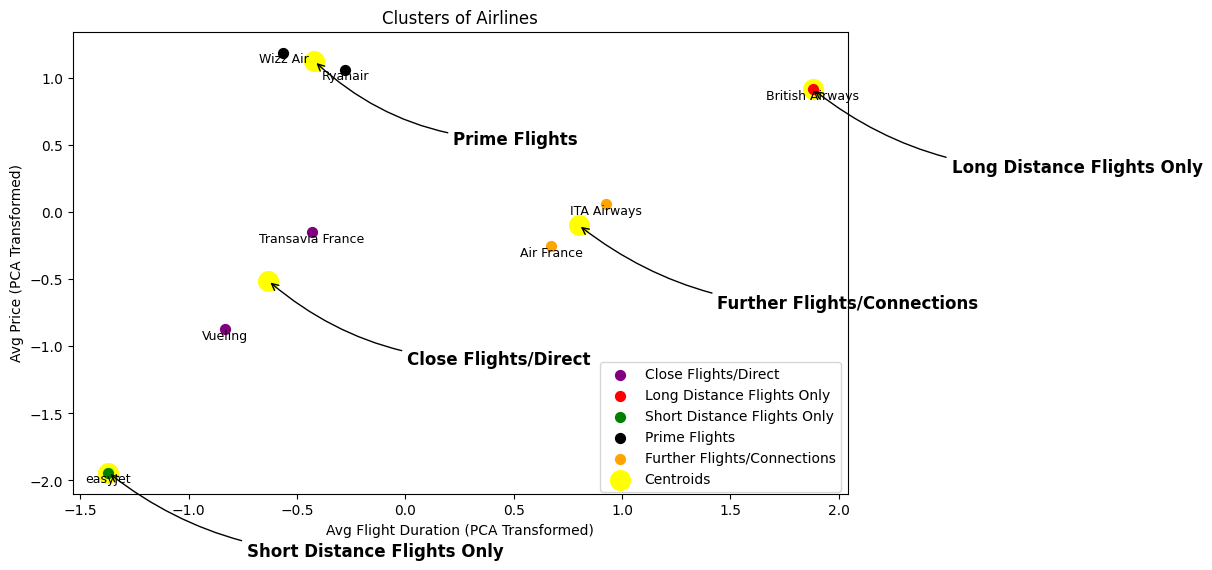

In [1575]:
# manual PCA:
PC1 = 0.5 * flight_duration_data_scaled[:, 0] + 0.5 * flight_duration_data_scaled[:, 1]  # 50% of Onward Duration and 50% of Return Duration
PC2 = flight_duration_data_scaled[:, 2]  # 100% of Price

custom_pca = np.vstack([PC1, PC2]).T  # Stack the two components

custom_pca_df = pd.DataFrame(custom_pca, columns=['PC1', 'PC2'])

# k-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(custom_pca)


# Scatter plot for the clusters
plt.figure(figsize=(10,6))
labels = ['Close Flights/Direct', 'Long Distance Flights Only', 'Short Distance Flights Only', 'Prime Flights', 'Further Flights/Connections']

plt.scatter(custom_pca_df.iloc[y_kmeans == 0, 1], custom_pca_df.iloc[y_kmeans == 0, 0], s=50, c='purple', label='Close Flights/Direct', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 1, 1], custom_pca_df.iloc[y_kmeans == 1, 0], s=50, c='red', label='Long Distance Flights Only', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 2, 1], custom_pca_df.iloc[y_kmeans == 2, 0], s=50, c='green', label='Short Distance Flights Only', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 3, 1], custom_pca_df.iloc[y_kmeans == 3, 0], s=50, c='black', label='Prime Flights', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 4, 1], custom_pca_df.iloc[y_kmeans == 4, 0], s=50, c='orange', label='Further Flights/Connections', zorder=3)

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg Flight Duration (PCA Transformed)')
plt.ylabel('Avg Price (PCA Transformed)')

# Annotate the points with their labels
for i, txt in enumerate(flight_duration_data.index):
    plt.text(custom_pca_df.iloc[i,1], custom_pca_df.iloc[i,0], txt, fontsize=9, ha='center', va='top', color='black')

# Annotate the centroids
for label, x, y in zip(labels, kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0]):
    plt.annotate(label, xy=(x, y), xytext=(100, -50), 
                 va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1, 0.3])
plt.show()

In [1576]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

In [1577]:
'''From this graph it seems that the longer the flight duration the higher the price.
However we understand that if the flight duration is the same, but the price is different, some factor must play a part.
We can rule out the flight times playing a major role in this because earlier we saw that the flight times didn't really correlate with the price.
These "outliers" are probably premium flights offering something that the others don't such as included carry-ons or other things that we will now check
Ofcourse because the correlation is not so high these are only partially true conclusions.
Another issue is the fact that not all these airlines operate the same routes of flights, thus changing the avg flight duration
'''

'From this graph it seems that the longer the flight duration the higher the price.\nHowever we understand that if the flight duration is the same, but the price is different, some factor must play a part.\nWe can rule out the flight times playing a major role in this because earlier we saw that the flight times didn\'t really correlate with the price.\nThese "outliers" are probably premium flights offering something that the others don\'t such as included carry-ons or other things that we will now check\nOfcourse because the correlation is not so high these are only partially true conclusions.\nAnother issue is the fact that not all these airlines operate the same routes of flights, thus changing the avg flight duration\n'

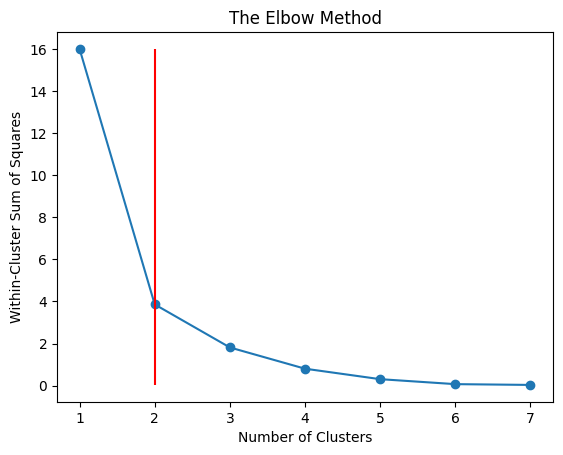

In [1578]:
# avg Carry-ons:
flight_carryOn_data = df_cluster.iloc[:, [4,5]]
flight_carryOn_data_scaled = scaler.fit_transform(flight_carryOn_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_carryOn_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [1579]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_carryOn_data_scaled)
    score = silhouette_score(flight_carryOn_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.619072018328871
3 clusters silhouette score is 0.48980671394302255
4 clusters silhouette score is 0.537587393299332
5 clusters silhouette score is 0.28196151955026716
6 clusters silhouette score is 0.3171900157680774
7 clusters silhouette score is 0.19459776417917707


In [1580]:
X = flight_carryOn_data_scaled
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

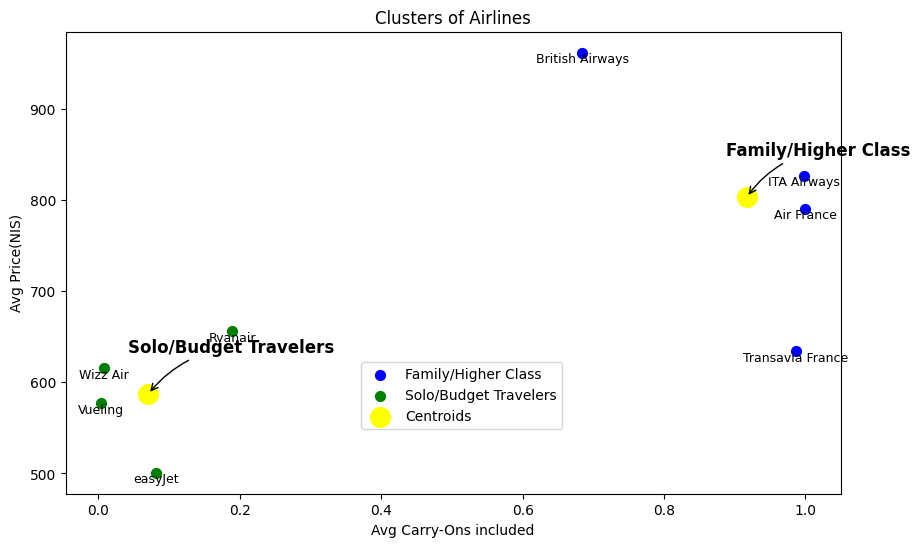

In [1581]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Family/Higher Class', 'Solo/Budget Travelers']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'blue', label= 'Family/Higher Class',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'green', label= 'Solo/Budget Travelers',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg Carry-Ons included')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_carryOn_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-15,40), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[0.65,0.3])
plt.show()

In [1582]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

In [1583]:
'''Because of the high correlation we know that Carry-ons included in the price effect the price heavily
We can cluster airlines into policys for types of traveler because of this.
Solo travelers who are looking for cheap flights might not want to spend extra for a carry-on while families and higher class people
wont mind paying extra so that they can bring a carry-on'''

'Because of the high correlation we know that Carry-ons included in the price effect the price heavily\nWe can cluster airlines into policys for types of traveler because of this.\nSolo travelers who are looking for cheap flights might not want to spend extra for a carry-on while families and higher class people\nwont mind paying extra so that they can bring a carry-on'

In [1584]:
'''next we will look at how the avg TTT of airlines contrast with the avg price'''

'next we will look at how the avg TTT of airlines contrast with the avg price'

In [1585]:
df_cluster.iloc[:, [2,5]]

,avgTTT,avgPrice
Airline,,
Air France,12.590778,790.478556
British Airways,19.837447,961.606537
ITA Airways,14.018628,826.501234
Ryanair,15.498389,655.890774
Transavia France,19.862347,634.129143
Vueling,14.818798,576.935975
Wizz Air,14.880097,615.469851
easyJet,15.497952,500.776666


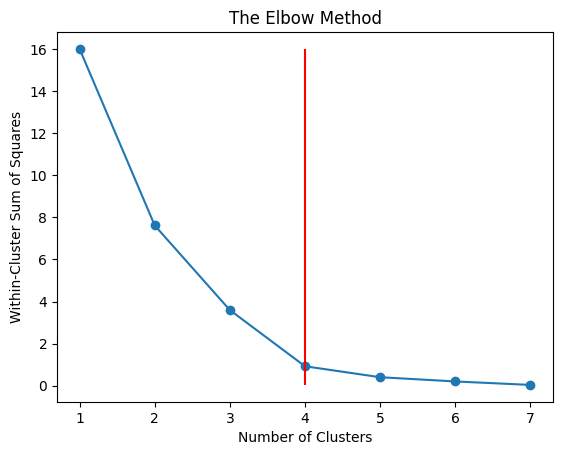

In [1586]:
# avg ttt
flight_ttt_data = df_cluster.iloc[:, [2,5]]
flight_ttt_data_scaled = scaler.fit_transform(flight_ttt_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_ttt_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [1587]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_ttt_data_scaled)
    score = silhouette_score(flight_ttt_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.4403927116021414
3 clusters silhouette score is 0.4857179536372383
4 clusters silhouette score is 0.4711699073876951
5 clusters silhouette score is 0.3266507656535058
6 clusters silhouette score is 0.1769900019369603
7 clusters silhouette score is 0.10383306423953644


In [1588]:
X = flight_ttt_data_scaled
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

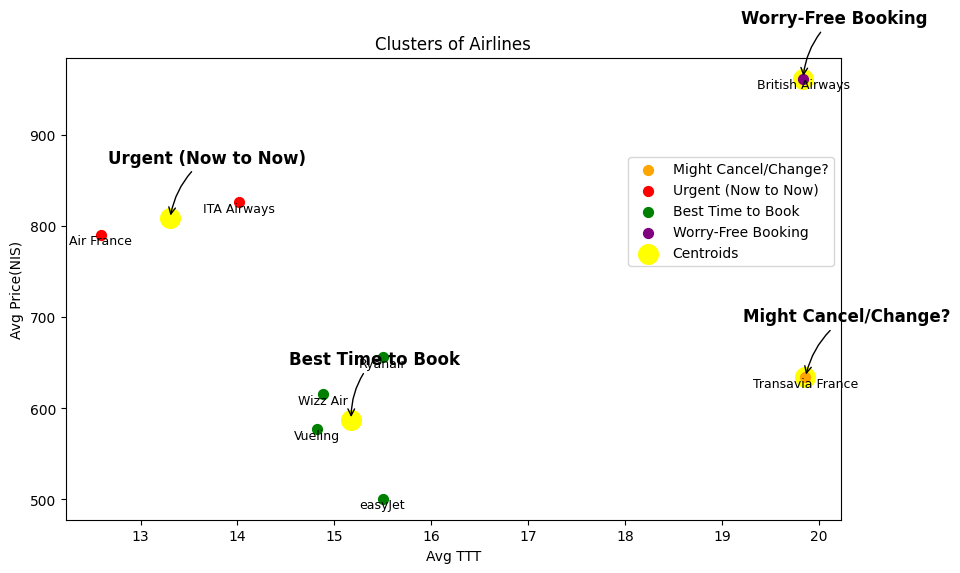

In [1589]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Might Cancel/Change?', 'Urgent (Now to Now)', 'Best Time to Book', 'Worry-Free Booking']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'orange', label= 'Might Cancel/Change?',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'red', label= 'Urgent (Now to Now)',zorder=3)
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 50, c = 'green', label= 'Best Time to Book',zorder=3)
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 50, c = 'purple', label= 'Worry-Free Booking',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg TTT')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_ttt_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-45,50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [1590]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

In [1591]:
'''The correlation makes it tricky to understand if the further you book in advance the cheaper the flight will be
The airlines that are higher priced probably provide insurances that the flight won't be cancelled or changed'''

"The correlation makes it tricky to understand if the further you book in advance the cheaper the flight will be\nThe airlines that are higher priced probably provide insurances that the flight won't be cancelled or changed"

In [1592]:
'''finally we will check how the avg LOS affecs the price for the airlines.'''

'finally we will check how the avg LOS affecs the price for the airlines.'

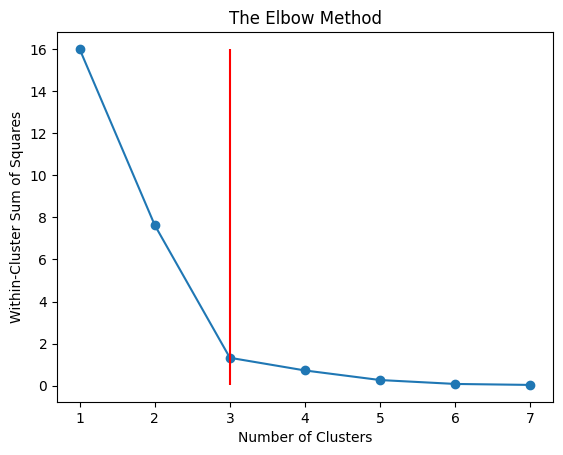

In [1593]:
# avg los
flight_los_data = df_cluster.iloc[:, [3,5]]
flight_los_data_scaled = scaler.fit_transform(flight_los_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_los_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [1594]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_los_data_scaled)
    score = silhouette_score(flight_los_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.5162530627566427
3 clusters silhouette score is 0.5773490790404258
4 clusters silhouette score is 0.3920029519482406
5 clusters silhouette score is 0.23745652631805064
6 clusters silhouette score is 0.08546246333366664
7 clusters silhouette score is 0.011117199180345165


In [1595]:
X = flight_los_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

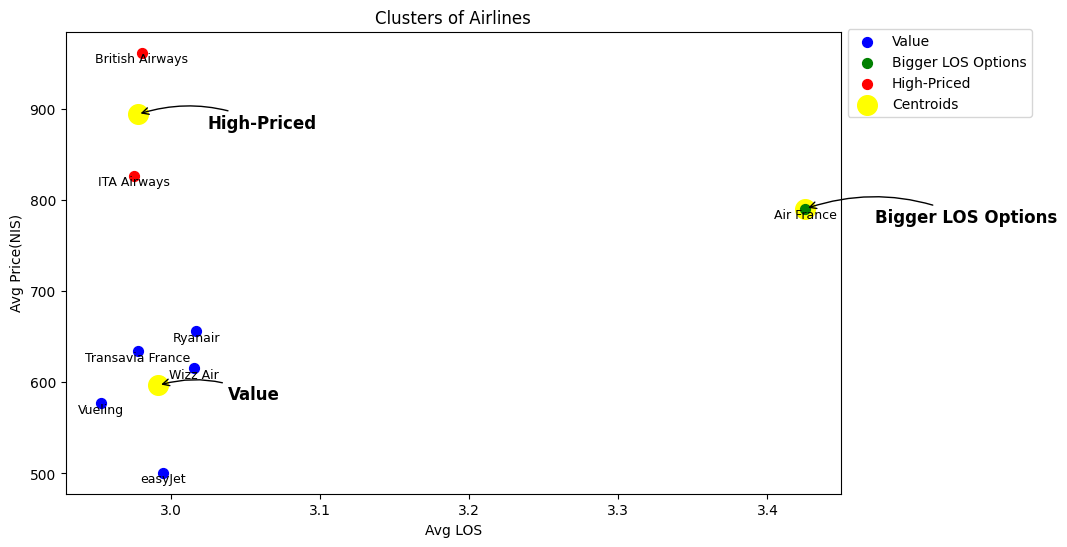

In [1596]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Value', 'Bigger LOS Options', 'High-Priced']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'blue', label= 'Value',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'green', label= 'Bigger LOS Options',zorder=3)
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 50, c = 'red', label= 'High-Priced',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg LOS')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_los_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(50,0), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [1597]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.523009
avgReturnFlightDurationMin    0.502196
avgTTT                        0.196779
avgLOS                        0.229632
avgCarryOns                   0.653462
avgPrice                      1.000000
priceStd                     -0.063683
flightsCount                 -0.630256
Name: avgPrice, dtype: float64

In [1598]:
'''The low correlation between the avg LOS and the avg price explains why the graph looks like this.
most of the airlines avg LOS is nearly the same yet different price ranges, with only Air France changing the correlation to be like this.
We can't really infer anything from this except maybe that Air France offers bigger LOS flights, but the price will be accordingly.'''

"The low correlation between the avg LOS and the avg price explains why the graph looks like this.\nmost of the airlines avg LOS is nearly the same yet different price ranges, with only Air France changing the correlation to be like this.\nWe can't really infer anything from this except maybe that Air France offers bigger LOS flights, but the price will be accordingly."